In [1]:
import numpy as np
import pandas as pd

In [2]:
traffic_data = pd.read_csv(r"C:\Users\Window\Downloads\Machine Learning Project\Traffic_Volume_Counts_20250204.csv")
weather_data = pd.read_csv(r"C:\Users\Window\Downloads\Machine Learning Project/NYC_Weather_2016_2022.csv")

In [3]:
df_long_traffic_data = traffic_data.melt(id_vars=["ID", "SegmentID", "Roadway Name", "From", "To", "Direction", "Date"], 
                  var_name="Time", 
                  value_name="Traffic Volume")

# Display the transformed dataset
df_long_traffic_data.head()

,ID,SegmentID,Roadway Name,From,To,Direction,Date,Time,Traffic Volume
0,1,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,1/9/2012,12:00-1:00 AM,20.0
1,2,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,1/10/2012,12:00-1:00 AM,21.0
2,3,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,1/11/2012,12:00-1:00 AM,27.0
3,4,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,1/12/2012,12:00-1:00 AM,22.0
4,5,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,1/13/2012,12:00-1:00 AM,31.0


In [4]:
df_long_traffic_data.describe().round(2)

,ID,SegmentID,Traffic Volume
count,1111656.00,1111656.00,1023064.00
mean,302.93,498815.94,440.89
std,504.42,1875281.69,647.01
min,1.00,202.00,0.00
25%,95.00,34027.00,101.00
50%,193.00,75343.00,248.00
75%,299.00,144881.00,492.00
max,3393.00,9017050.00,10532.00


In [5]:
weather_data.describe().round(2)

,temperature_2m (°C),precipitation (mm),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°)
count,59592.00,59592.00,59592.00,59592.00,59592.00,59592.00,59592.00,59592.00,59587.00
mean,13.25,0.13,0.12,45.45,25.61,30.11,40.29,11.38,203.72
std,9.80,0.54,0.53,38.27,37.16,36.84,42.53,5.80,99.72
min,-18.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,5.20,0.00,0.00,7.00,0.00,0.00,0.00,7.20,129.00
50%,13.50,0.00,0.00,35.00,2.00,10.00,20.00,10.40,222.00
75%,21.80,0.00,0.00,89.00,46.00,58.00,92.00,14.50,288.00
max,35.50,19.20,19.20,100.00,100.00,100.00,100.00,47.20,360.00


In [6]:
print(df_long_traffic_data.isnull().sum())
print(weather_data.isnull().sum())

ID                    0
SegmentID             0
Roadway Name          0
From                  0
To                    0
Direction             0
Date                  0
Time                  0
Traffic Volume    88592
dtype: int64
time                       0
temperature_2m (°C)      168
precipitation (mm)       168
rain (mm)                168
cloudcover (%)           168
cloudcover_low (%)       168
cloudcover_mid (%)       168
cloudcover_high (%)      168
windspeed_10m (km/h)     168
winddirection_10m (°)    173
dtype: int64


In [7]:
import pandas as pd

# Convert Date column to datetime format
df_long_traffic_data['Date'] = pd.to_datetime(df_long_traffic_data['Date'])

# Filter only data from the year 2017
df_long_traffic_data_2017 = df_long_traffic_data[df_long_traffic_data['Date'].dt.year == 2017]


In [8]:
import numpy as np
import pandas as pd
df_2017_traffic_data = pd.read_csv("2017_traffic_data.csv")

In [9]:
print(df_2017_traffic_data.isnull().sum())

ID                0
SegmentID         0
Roadway Name      0
From              0
To                0
Direction         0
Date              0
Time              0
Traffic Volume    0
dtype: int64


In [10]:
df_2017_traffic_data['Date'] = pd.to_datetime(df_2017_traffic_data['Date'], format='%m/%d/%Y')

In [11]:
df_2017_traffic_data['Hour'] =  df_2017_traffic_data['Time'].str.extract(r'(\d+):\d+')[0].astype(int)

In [12]:



df_2017_traffic_data['Date'] = pd.to_datetime(df_2017_traffic_data['Date'], format='%m/%d/%Y')

# Extract hour and convert to 24-hour format (as discussed previously)
df_2017_traffic_data['Hour'] = df_2017_traffic_data['Time'].str.extract(r'(\d+):\d+')[0].astype(int)
df_2017_traffic_data['AM_PM'] = df_2017_traffic_data['Time'].str.extract(r'([APM]+)')[0]
df_2017_traffic_data['Hour'] = df_2017_traffic_data.apply(
    lambda row: row['Hour'] if row['AM_PM'] == 'AM' and row['Hour'] != 12 else 
                (row['Hour'] + 12 if row['AM_PM'] == 'PM' and row['Hour'] != 12 else 0), axis=1
)

# Create standardized datetime column
df_2017_traffic_data['Standardized_Datetime'] = df_2017_traffic_data['Date'] + pd.to_timedelta(df_2017_traffic_data['Hour'], unit='h')

# Ensure the datetime format is correct
df_2017_traffic_data['Standardized_Datetime'] = pd.to_datetime(df_2017_traffic_data['Standardized_Datetime'])


In [13]:
df_2017_traffic_data.head()

,ID,SegmentID,Roadway Name,From,To,Direction,Date,Time,Traffic Volume,Hour,AM_PM,Standardized_Datetime
0,185,35806,5th AVENUE,EAST 46th STREET,EAST 47th STREET,SB,2017-01-14,12:00-1:00 AM,1286,0,AM,2017-01-14
1,186,35960,3rd AVENUE,EAST 46th STREET,EAST 47th STREET,NB,2017-01-14,12:00-1:00 AM,607,0,AM,2017-01-14
2,185,35806,5th AVENUE,EAST 46th STREET,EAST 47th STREET,SB,2017-01-15,12:00-1:00 AM,1233,0,AM,2017-01-15
3,186,35960,3rd AVENUE,EAST 46th STREET,EAST 47th STREET,NB,2017-01-15,12:00-1:00 AM,456,0,AM,2017-01-15
4,185,35806,5th AVENUE,EAST 46th STREET,EAST 47th STREET,SB,2017-01-16,12:00-1:00 AM,690,0,AM,2017-01-16


In [14]:
print(weather_data.isnull().sum())

time                       0
temperature_2m (°C)      168
precipitation (mm)       168
rain (mm)                168
cloudcover (%)           168
cloudcover_low (%)       168
cloudcover_mid (%)       168
cloudcover_high (%)      168
windspeed_10m (km/h)     168
winddirection_10m (°)    173
dtype: int64


In [15]:
import pandas as pd

# Convert the datetime column to pandas datetime format
weather_data['datetime'] = pd.to_datetime(weather_data['time'], format='%Y-%m-%dT%H:%M', errors='coerce')


In [16]:
weather_data_2017 = weather_data[weather_data['datetime'].dt.year == 2017]

In [17]:
weather_data_2017.head()

,time,temperature_2m (°C),precipitation (mm),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°),datetime
8784,2017-01-01T00:00,5.7,0.0,0.0,90.0,0.0,100.0,99.0,19.2,208.0,2017-01-01 00:00:00
8785,2017-01-01T01:00,5.6,0.0,0.0,89.0,1.0,100.0,94.0,18.8,212.0,2017-01-01 01:00:00
8786,2017-01-01T02:00,5.5,0.0,0.0,75.0,1.0,96.0,54.0,16.0,211.0,2017-01-01 02:00:00
8787,2017-01-01T03:00,5.9,0.0,0.0,70.0,2.0,95.0,38.0,15.6,214.0,2017-01-01 03:00:00
8788,2017-01-01T04:00,6.1,0.0,0.0,77.0,2.0,92.0,67.0,16.5,216.0,2017-01-01 04:00:00


In [18]:
# Ensure modifications are done safely using .loc
weather_data_2017.loc[:, "Date"] = weather_data_2017["datetime"].dt.normalize()
weather_data_2017.loc[:, "Hour"] = weather_data_2017["datetime"].dt.hour


C:\Users\Window\AppData\Local\Temp\ipykernel_22032\1224834767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_2017.loc[:, "Date"] = weather_data_2017["datetime"].dt.normalize()
C:\Users\Window\AppData\Local\Temp\ipykernel_22032\1224834767.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_2017.loc[:, "Hour"] = weather_data_2017["datetime"].dt.hour


In [19]:
weather_data_2017.head()

,time,temperature_2m (°C),precipitation (mm),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°),datetime,Date,Hour
8784,2017-01-01T00:00,5.7,0.0,0.0,90.0,0.0,100.0,99.0,19.2,208.0,2017-01-01 00:00:00,2017-01-01,0
8785,2017-01-01T01:00,5.6,0.0,0.0,89.0,1.0,100.0,94.0,18.8,212.0,2017-01-01 01:00:00,2017-01-01,1
8786,2017-01-01T02:00,5.5,0.0,0.0,75.0,1.0,96.0,54.0,16.0,211.0,2017-01-01 02:00:00,2017-01-01,2
8787,2017-01-01T03:00,5.9,0.0,0.0,70.0,2.0,95.0,38.0,15.6,214.0,2017-01-01 03:00:00,2017-01-01,3
8788,2017-01-01T04:00,6.1,0.0,0.0,77.0,2.0,92.0,67.0,16.5,216.0,2017-01-01 04:00:00,2017-01-01,4


In [20]:
merged_df = df_2017_traffic_data.merge(weather_data_2017, on=["Date", "Hour"], how="inner")


In [21]:
merged_df.head()
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123912 entries, 0 to 123911
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID                     123912 non-null  int64         
 1   SegmentID              123912 non-null  int64         
 2   Roadway Name           123912 non-null  object        
 3   From                   123912 non-null  object        
 4   To                     123912 non-null  object        
 5   Direction              123912 non-null  object        
 6   Date                   123912 non-null  datetime64[ns]
 7   Time                   123912 non-null  object        
 8   Traffic Volume         123912 non-null  int64         
 9   Hour                   123912 non-null  int64         
 10  AM_PM                  123912 non-null  object        
 11  Standardized_Datetime  123912 non-null  datetime64[ns]
 12  time                   123912 non-null  obje

In [22]:
merged_df = merged_df.drop(columns=['ID', 'Date', 'Time', 'AM_PM', 'From', 'To', 'Roadway Name', 'time'])

In [23]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123912 entries, 0 to 123911
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   SegmentID              123912 non-null  int64         
 1   Direction              123912 non-null  object        
 2   Traffic Volume         123912 non-null  int64         
 3   Hour                   123912 non-null  int64         
 4   Standardized_Datetime  123912 non-null  datetime64[ns]
 5   temperature_2m (°C)    123912 non-null  float64       
 6   precipitation (mm)     123912 non-null  float64       
 7   rain (mm)              123912 non-null  float64       
 8   cloudcover (%)         123912 non-null  float64       
 9   cloudcover_low (%)     123912 non-null  float64       
 10  cloudcover_mid (%)     123912 non-null  float64       
 11  cloudcover_high (%)    123912 non-null  float64       
 12  windspeed_10m (km/h)   123912 non-null  floa

In [24]:
merged_df['dayofweek'] = merged_df['Standardized_Datetime'].dt.dayofweek
merged_df['month'] = merged_df['Standardized_Datetime'].dt.month
merged_df['is_weekend'] = merged_df['dayofweek'].isin([5, 6]).astype(int)

In [25]:
merged_df.head(10)

,SegmentID,Direction,Traffic Volume,Hour,Standardized_Datetime,temperature_2m (°C),precipitation (mm),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°),datetime,dayofweek,month,is_weekend
0,35806,SB,1286,0,2017-01-14,2.7,0.0,0.0,29.0,0.0,0.0,98.0,13.2,334.0,2017-01-14,5,1,1
1,35960,NB,607,0,2017-01-14,2.7,0.0,0.0,29.0,0.0,0.0,98.0,13.2,334.0,2017-01-14,5,1,1
2,35806,SB,1233,0,2017-01-15,-1.0,0.2,0.0,100.0,80.0,99.0,100.0,2.2,171.0,2017-01-15,6,1,1
3,35960,NB,456,0,2017-01-15,-1.0,0.2,0.0,100.0,80.0,99.0,100.0,2.2,171.0,2017-01-15,6,1,1
4,35806,SB,690,0,2017-01-16,0.8,0.0,0.0,0.0,0.0,0.0,0.0,8.2,299.0,2017-01-16,0,1,0
5,35960,NB,739,0,2017-01-16,0.8,0.0,0.0,0.0,0.0,0.0,0.0,8.2,299.0,2017-01-16,0,1,0
6,35806,SB,665,0,2017-01-17,3.0,0.0,0.0,69.0,0.0,66.0,97.0,9.9,226.0,2017-01-17,1,1,0
7,35960,NB,745,0,2017-01-17,3.0,0.0,0.0,69.0,0.0,66.0,97.0,9.9,226.0,2017-01-17,1,1,0
8,35806,SB,1034,0,2017-01-18,3.5,0.2,0.2,100.0,100.0,99.0,38.0,10.8,75.0,2017-01-18,2,1,0
9,35960,NB,1336,0,2017-01-18,3.5,0.2,0.2,100.0,100.0,99.0,38.0,10.8,75.0,2017-01-18,2,1,0


In [26]:
Q1 = merged_df['Traffic Volume'].quantile(0.25)
Q3 = merged_df['Traffic Volume'].quantile(0.75)

def label_traffic(volume):
    if volume <= Q1:
        return 'Low'
    elif volume >= Q3:
        return 'High'
    else:
        return 'Medium'

merged_df['Traffic_level'] = merged_df['Traffic Volume'].apply(label_traffic)

In [27]:
merged_df.head()

,SegmentID,Direction,Traffic Volume,Hour,Standardized_Datetime,temperature_2m (°C),precipitation (mm),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°),datetime,dayofweek,month,is_weekend,Traffic_level
0,35806,SB,1286,0,2017-01-14,2.7,0.0,0.0,29.0,0.0,0.0,98.0,13.2,334.0,2017-01-14,5,1,1,High
1,35960,NB,607,0,2017-01-14,2.7,0.0,0.0,29.0,0.0,0.0,98.0,13.2,334.0,2017-01-14,5,1,1,High
2,35806,SB,1233,0,2017-01-15,-1.0,0.2,0.0,100.0,80.0,99.0,100.0,2.2,171.0,2017-01-15,6,1,1,High
3,35960,NB,456,0,2017-01-15,-1.0,0.2,0.0,100.0,80.0,99.0,100.0,2.2,171.0,2017-01-15,6,1,1,Medium
4,35806,SB,690,0,2017-01-16,0.8,0.0,0.0,0.0,0.0,0.0,0.0,8.2,299.0,2017-01-16,0,1,0,High


In [28]:
print(merged_df['Traffic_level'].value_counts())

Traffic_level
Medium    61774
Low       31160
High      30978
Name: count, dtype: int64


In [29]:
merged_df.describe(include='all') 

,SegmentID,Direction,Traffic Volume,Hour,Standardized_Datetime,temperature_2m (°C),precipitation (mm),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°),datetime,dayofweek,month,is_weekend,Traffic_level
count,1.239120e+05,123912,123912.000000,123912.000000,123912,123912.000000,123912.000000,123912.000000,123912.000000,123912.000000,123912.000000,123912.000000,123912.000000,123912.000000,123912,123912.000000,123912.00000,123912.000000,123912
unique,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium
freq,NaN,39096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61774
mean,5.924442e+05,NaN,424.060745,11.000000,2017-10-07 10:30:42.882045184,14.973320,0.104099,0.102896,43.224902,28.498531,23.591339,30.296727,10.889242,190.032281,2017-10-07 10:30:42.882045184,3.554716,9.75983,0.444315,NaN
min,7.453000e+03,NaN,0.000000,0.000000,2017-01-14 00:00:00,-8.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000,2017-01-14 00:00:00,0.000000,1.00000,0.000000,NaN
25%,3.154000e+04,NaN,119.000000,4.750000,2017-09-27 14:00:00,9.800000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,6.600000,90.000000,2017-09-27 14:00:00,2.000000,9.00000,0.000000,NaN
50%,6.766500e+04,NaN,272.000000,10.500000,2017-10-10 10:30:00,15.900000,0.000000,0.000000,30.000000,6.000000,3.000000,1.000000,9.700000,196.000000,2017-10-10 10:30:00,4.000000,10.00000,0.000000,NaN
75%,1.429570e+05,NaN,496.250000,17.250000,2017-11-05 16:00:00,21.200000,0.000000,0.000000,84.000000,54.000000,38.000000,73.000000,14.600000,291.000000,2017-11-05 16:00:00,5.000000,11.00000,1.000000,NaN
max,9.013049e+06,NaN,5372.000000,23.000000,2017-11-19 23:00:00,29.400000,7.100000,7.100000,100.000000,100.000000,100.000000,100.000000,33.500000,360.000000,2017-11-19 23:00:00,6.000000,11.00000,1.000000,NaN


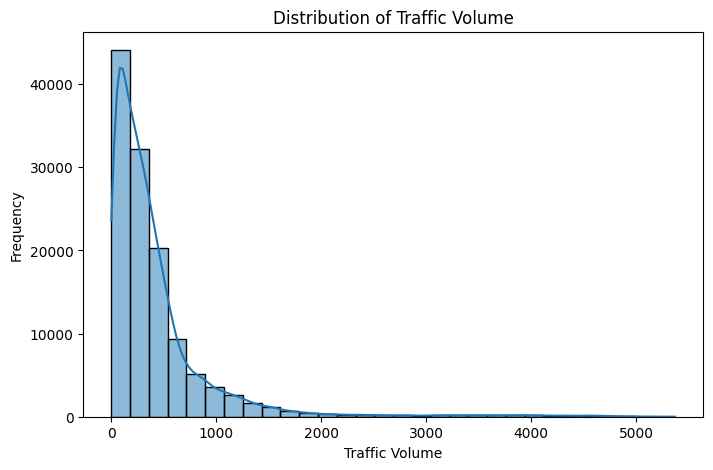

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(merged_df['Traffic Volume'], bins=30, kde=True)
plt.title("Distribution of Traffic Volume")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.show()

C:\Users\Window\AppData\Local\Temp\ipykernel_22032\1637437037.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='Traffic_level', palette='Set2')


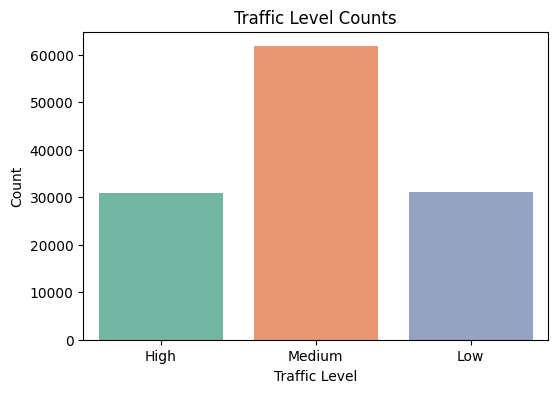

In [31]:
plt.figure(figsize=(6, 4))
sns.countplot(data=merged_df, x='Traffic_level', palette='Set2')
plt.title("Traffic Level Counts")
plt.xlabel("Traffic Level")
plt.ylabel("Count")
plt.show()


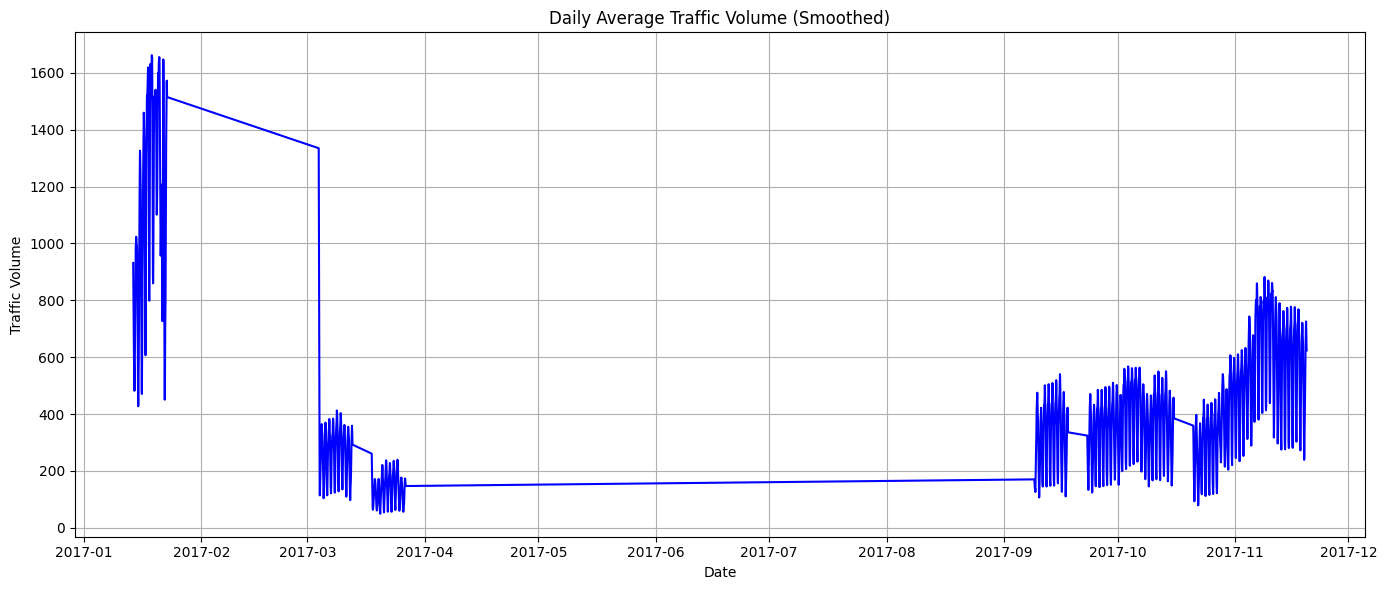

In [32]:
# Resample or group by date (assuming hourly data)
daily_avg = merged_df.groupby('datetime')['Traffic Volume'].mean().reset_index()

# Optional: apply a rolling average (e.g., 7-day smoothing)
daily_avg['rolling_avg'] = daily_avg['Traffic Volume'].rolling(window=7, min_periods=1).mean()

# Plot a single smoothed line
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_avg, x='datetime', y='rolling_avg', color='blue')
plt.title('Daily Average Traffic Volume (Smoothed)')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.tight_layout()
plt.show()


In [33]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123912 entries, 0 to 123911
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   SegmentID              123912 non-null  int64         
 1   Direction              123912 non-null  object        
 2   Traffic Volume         123912 non-null  int64         
 3   Hour                   123912 non-null  int64         
 4   Standardized_Datetime  123912 non-null  datetime64[ns]
 5   temperature_2m (°C)    123912 non-null  float64       
 6   precipitation (mm)     123912 non-null  float64       
 7   rain (mm)              123912 non-null  float64       
 8   cloudcover (%)         123912 non-null  float64       
 9   cloudcover_low (%)     123912 non-null  float64       
 10  cloudcover_mid (%)     123912 non-null  float64       
 11  cloudcover_high (%)    123912 non-null  float64       
 12  windspeed_10m (km/h)   123912 non-null  floa

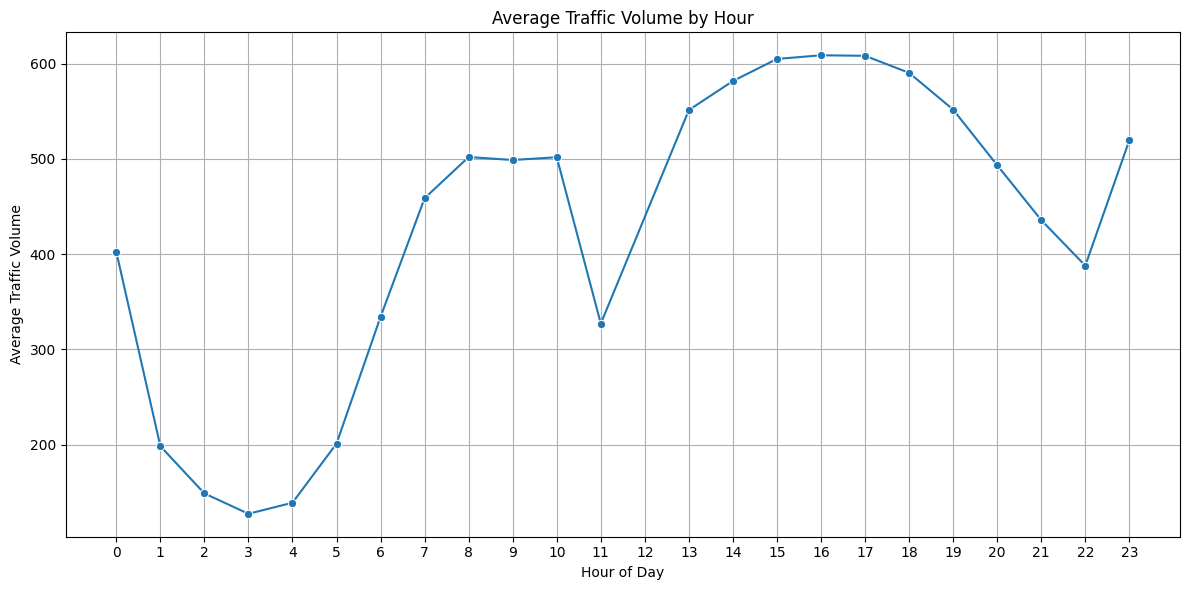

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Hour and calculate the average traffic volume
avg_traffic_by_hour = merged_df.groupby('Hour')['Traffic Volume'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_traffic_by_hour, x='Hour', y='Traffic Volume', marker='o')
plt.title("Average Traffic Volume by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Traffic Volume")
plt.xticks(range(0, 24))  # Ensure x-axis has all 24 hours
plt.grid(True)
plt.tight_layout()
plt.show()


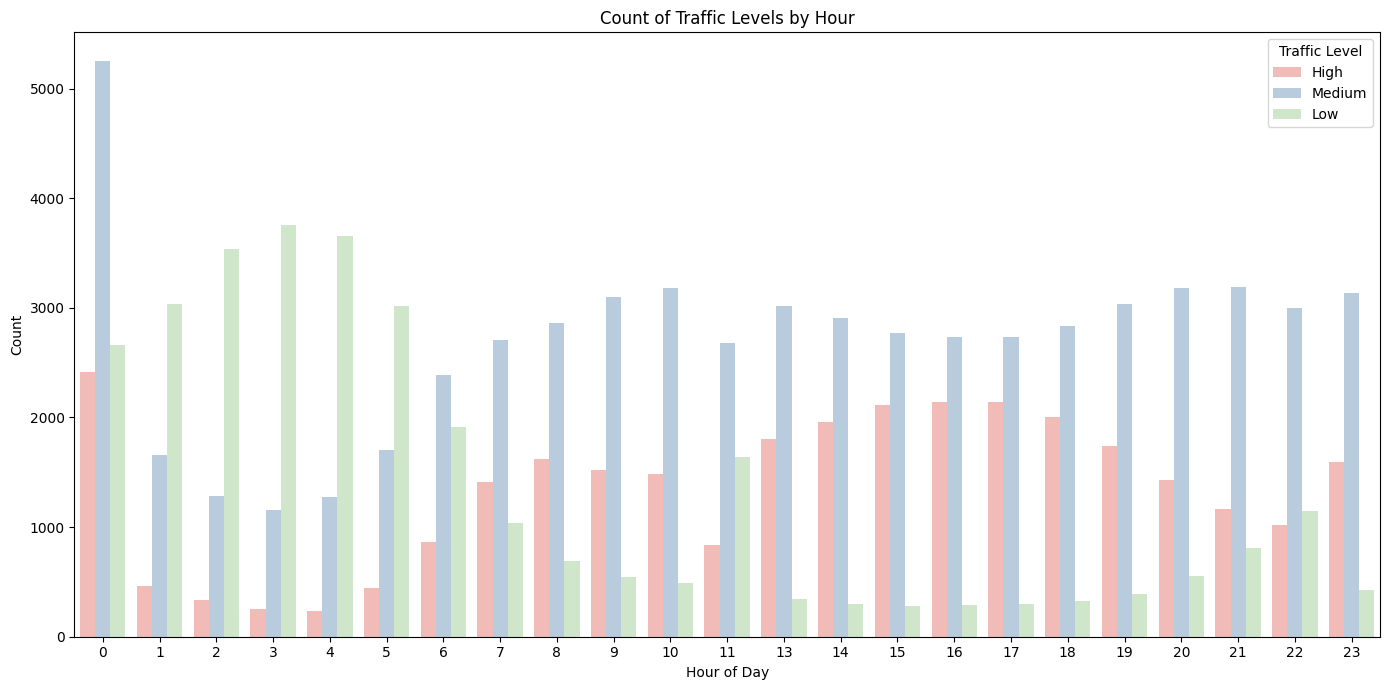

In [35]:
plt.figure(figsize=(14, 7))
sns.countplot(data=merged_df, x='Hour', hue='Traffic_level', palette='Pastel1')
plt.title("Count of Traffic Levels by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.legend(title='Traffic Level')
plt.tight_layout()
plt.show()


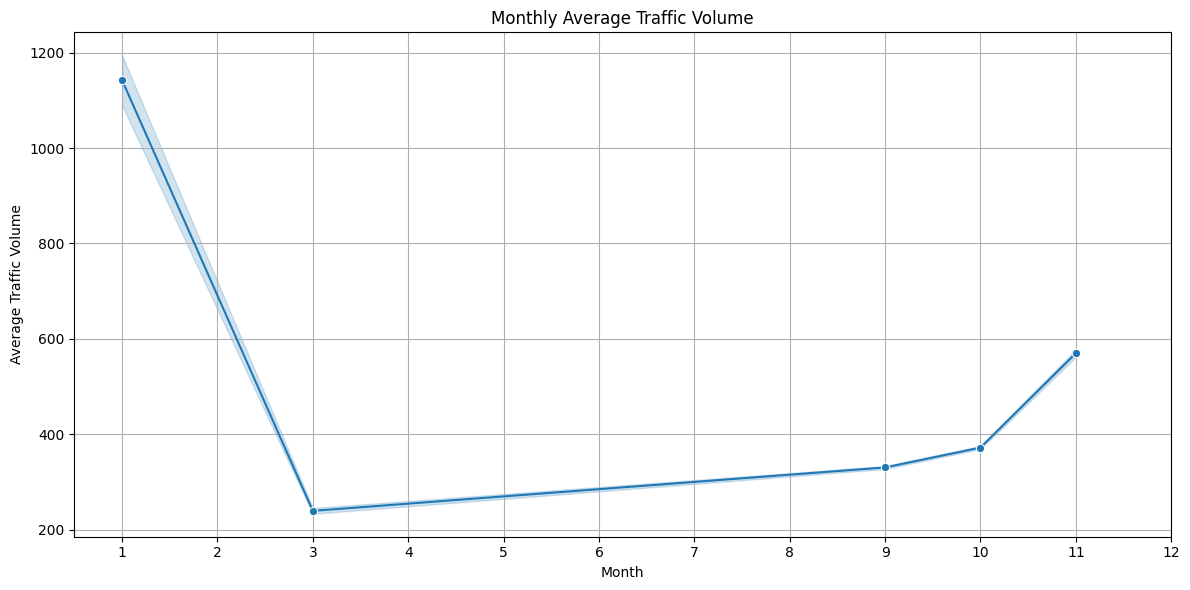

In [36]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x='month', y='Traffic Volume', marker='o')
plt.title("Monthly Average Traffic Volume")
plt.xlabel("Month")
plt.ylabel("Average Traffic Volume")
plt.xticks(range(1, 13))  # 1 to 12 for months
plt.grid(True)
plt.tight_layout()
plt.show()


In [37]:
level_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
merged_df['Traffic_level_num'] = merged_df['Traffic_level'].map(level_mapping)

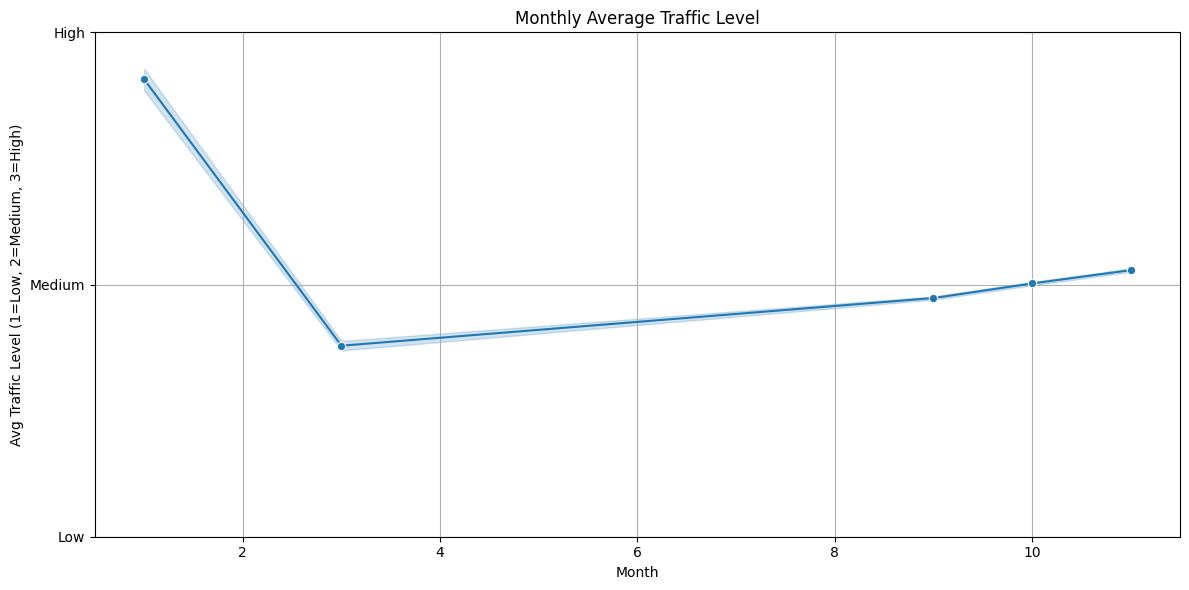

In [38]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x='month', y='Traffic_level_num', marker='o')
plt.title("Monthly Average Traffic Level")
plt.xlabel("Month")
plt.ylabel("Avg Traffic Level (1=Low, 2=Medium, 3=High)")
plt.yticks([1, 2, 3], ['Low', 'Medium', 'High'])
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Window\AppData\Local\Temp\ipykernel_22032\3478791723.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='Traffic_level', y=var, palette='Pastel2')


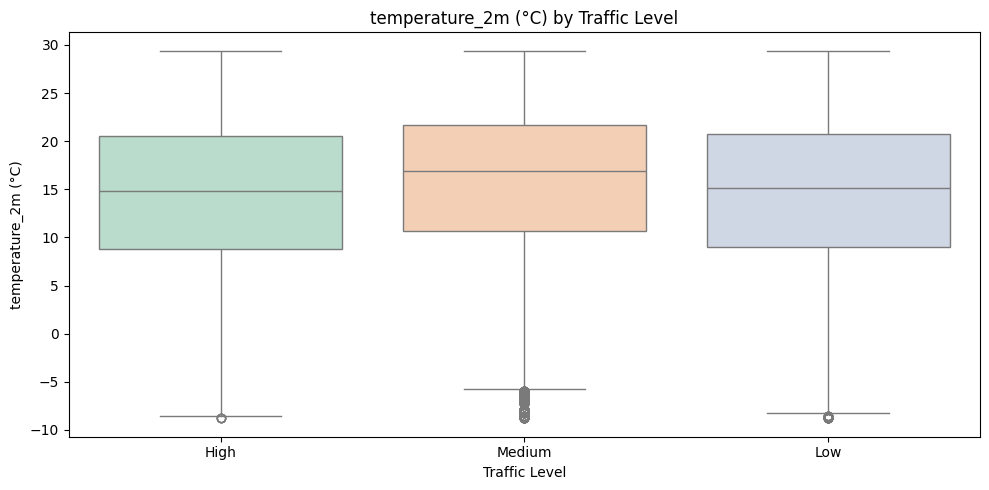

C:\Users\Window\AppData\Local\Temp\ipykernel_22032\3478791723.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='Traffic_level', y=var, palette='Pastel2')


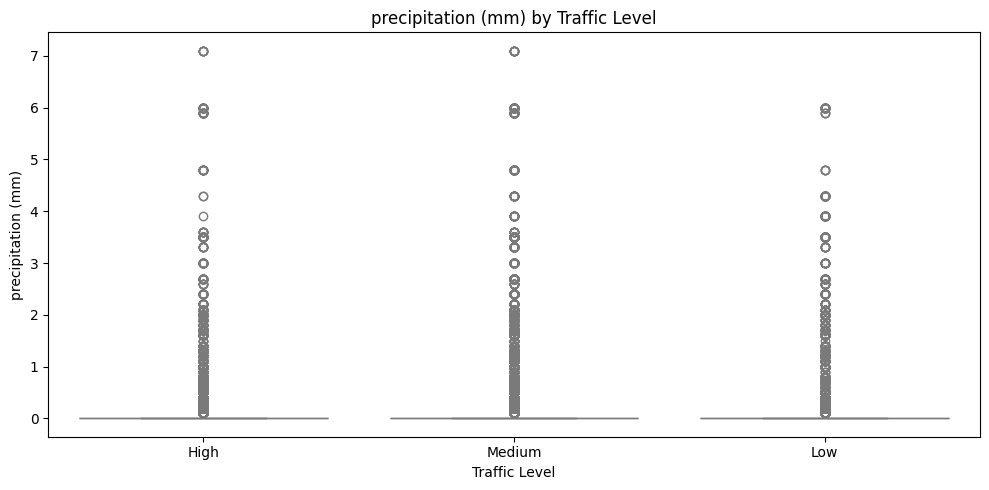

C:\Users\Window\AppData\Local\Temp\ipykernel_22032\3478791723.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='Traffic_level', y=var, palette='Pastel2')


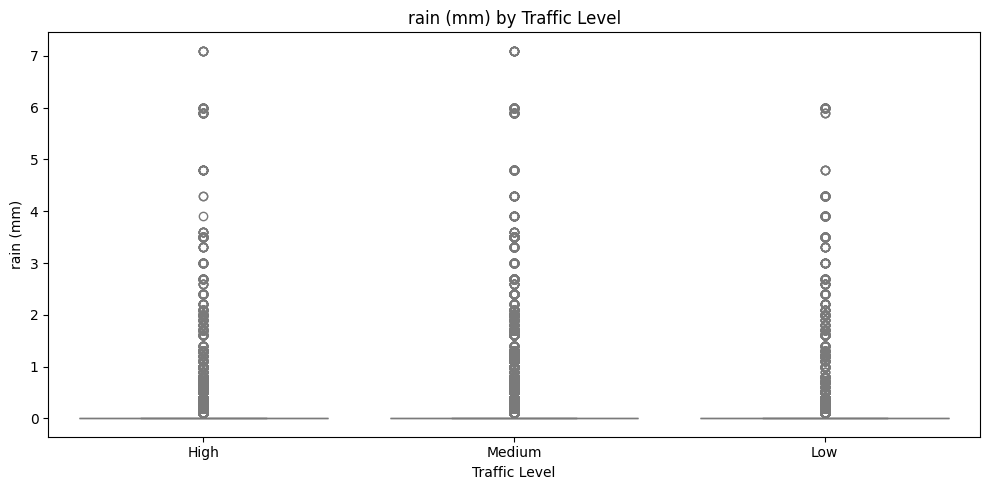

C:\Users\Window\AppData\Local\Temp\ipykernel_22032\3478791723.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='Traffic_level', y=var, palette='Pastel2')


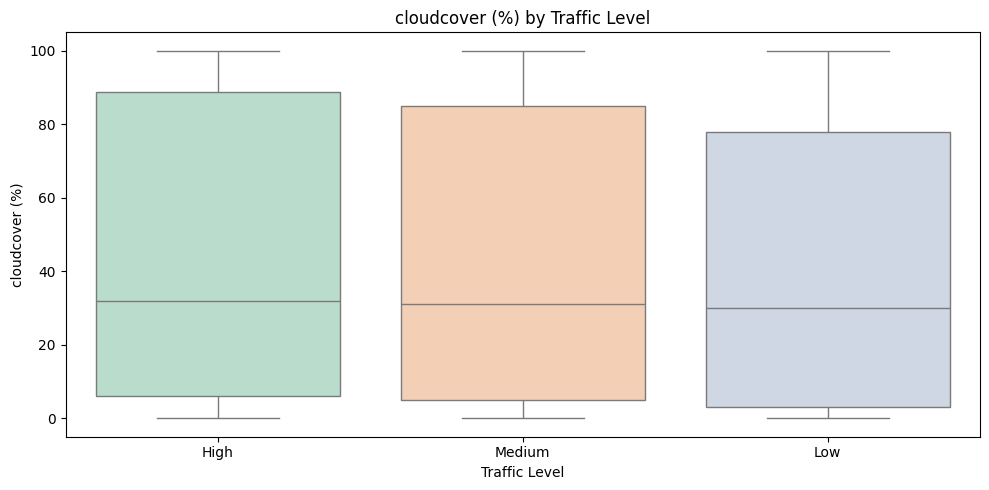

C:\Users\Window\AppData\Local\Temp\ipykernel_22032\3478791723.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='Traffic_level', y=var, palette='Pastel2')


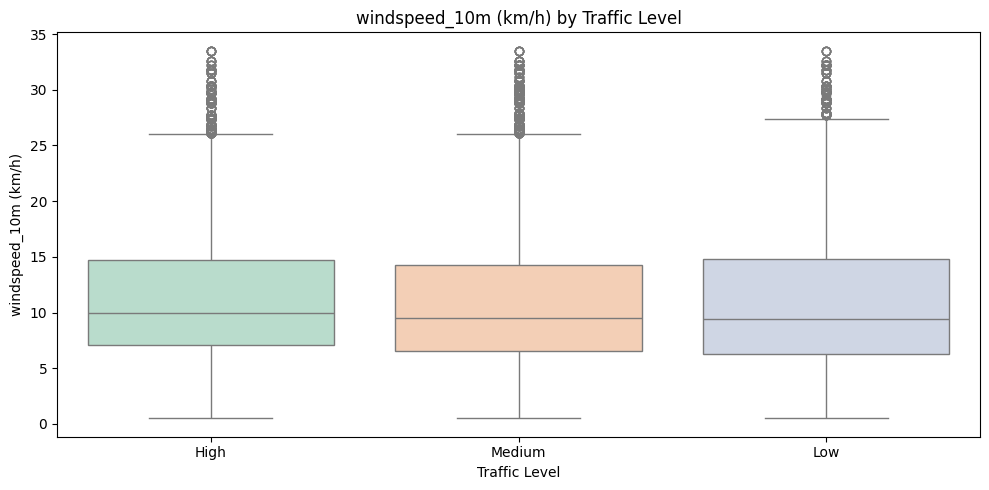

In [39]:
weather_vars = [
    'temperature_2m (°C)',
    'precipitation (mm)',
    'rain (mm)',
    'cloudcover (%)',
    'windspeed_10m (km/h)'
]

for var in weather_vars:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=merged_df, x='Traffic_level', y=var, palette='Pastel2')
    plt.title(f"{var} by Traffic Level")
    plt.xlabel("Traffic Level")
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()


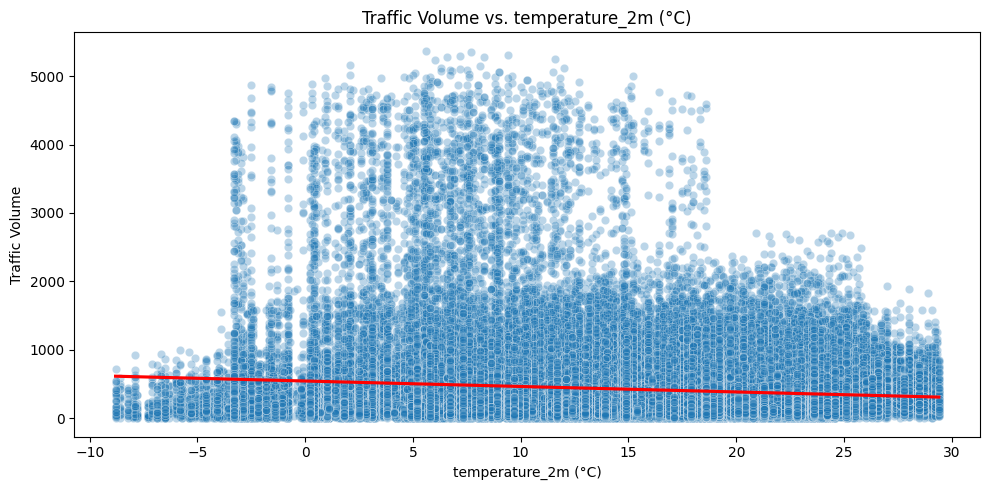

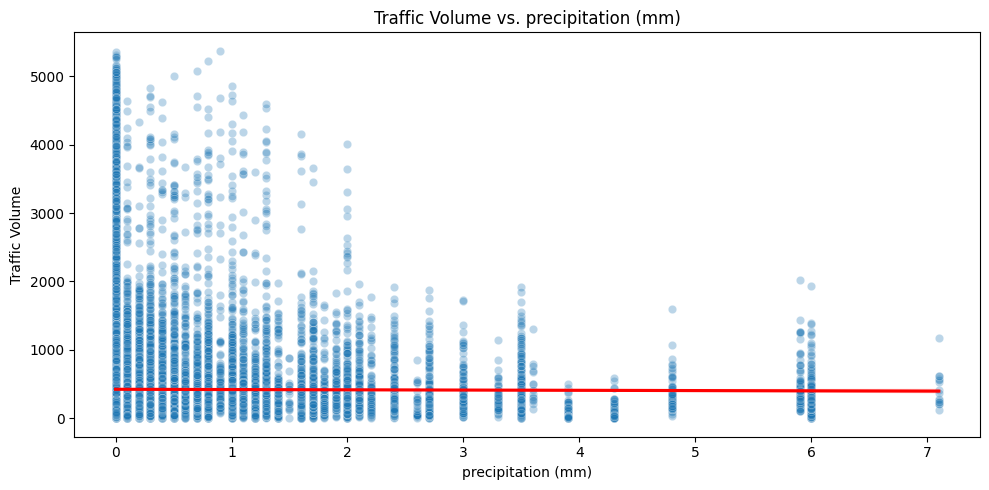

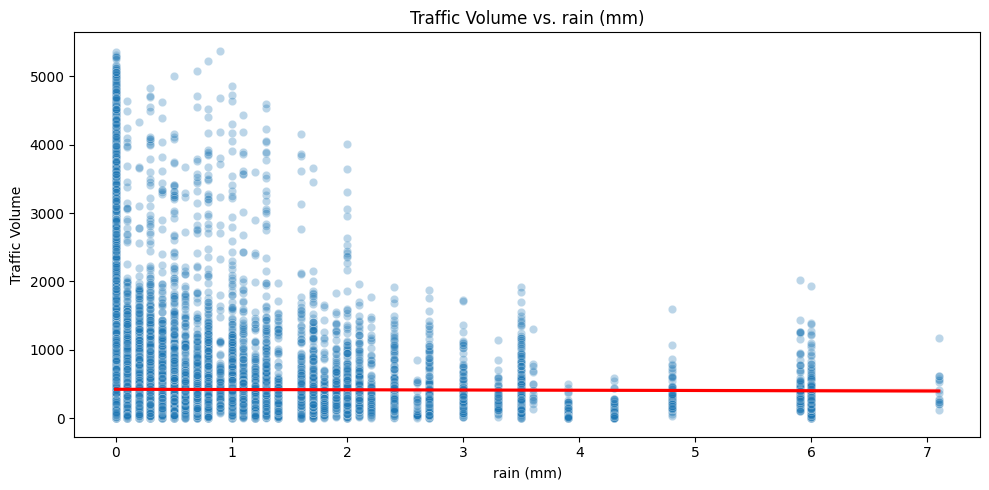

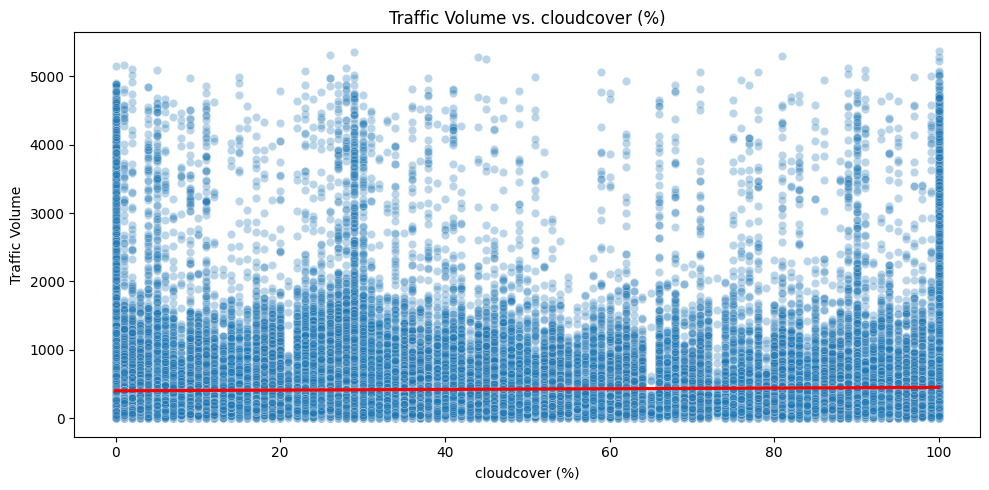

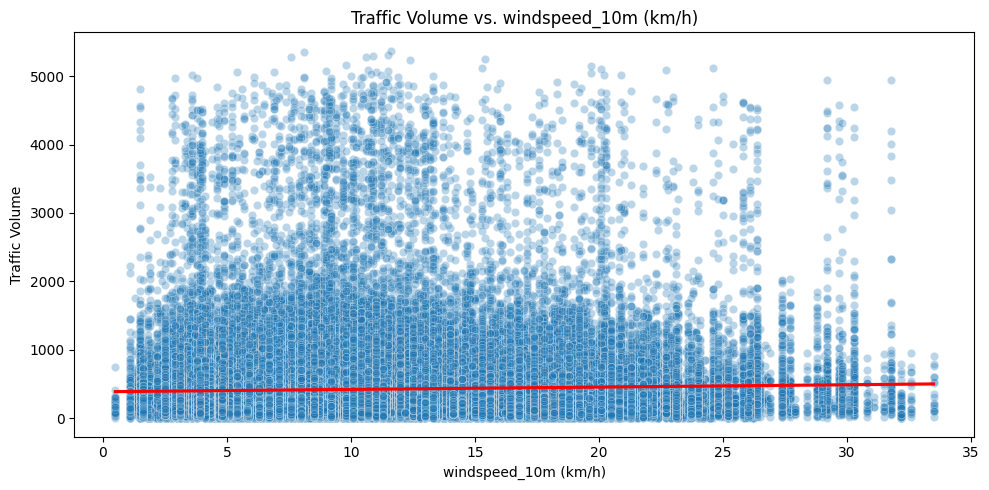

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

weather_vars = [
    'temperature_2m (°C)',
    'precipitation (mm)',
    'rain (mm)',
    'cloudcover (%)',
    'windspeed_10m (km/h)'
]

for idx, var in enumerate(weather_vars, start=1):
    plt.figure(figsize=(10, 5))
    
    sns.scatterplot(data=merged_df, x=var, y='Traffic Volume', alpha=0.3)
    sns.regplot(data=merged_df, x=var, y='Traffic Volume', scatter=False, color='red')
    
    plt.title(f"Traffic Volume vs. {var}")
    plt.xlabel(var)
    plt.ylabel("Traffic Volume")
    plt.tight_layout()
    
    filename = f"plot_{idx}.png"
    plt.savefig(filename, dpi=300)
    plt.show()
    plt.close()



In [41]:
print(merged_df['precipitation (mm)'].describe())
print(merged_df['rain (mm)'].describe())

count    123912.000000
mean          0.104099
std           0.475741
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.100000
Name: precipitation (mm), dtype: float64
count    123912.000000
mean          0.102896
std           0.474525
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.100000
Name: rain (mm), dtype: float64


In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Bin configuration
temperature_column = 'temperature_2m (°C)'
traffic_column = 'Traffic Volume'
bins = list(range(-10, 35, 5))
labels = [f'({bins[i]}, {bins[i+1]}]' for i in range(len(bins)-1)]

# Assign bins
merged_df['temp_bin'] = pd.cut(merged_df[temperature_column], bins=bins, labels=labels, include_lowest=True)

# Create numeric x-axis positions for bins
bin_positions = range(len(labels))
bin_map = dict(zip(labels, bin_positions))
merged_df['bin_pos'] = merged_df['temp_bin'].map(bin_map)

# Plot
plt.figure(figsize=(12, 6))

# Scatter plot of each traffic volume data point by bin position
plt.scatter(merged_df['bin_pos'], merged_df[traffic_column], alpha=0.3, color='blue', label='Traffic Volume')

# Formatting
plt.xticks(ticks=bin_positions, labels=labels, rotation=45)
plt.xlabel('Temperature Range (°C)')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume by Temperature Bins')
plt.legend()
plt.tight_layout()

# Save the plot
plt.savefig('traffic_volume_by_temp_bins.png', dpi=300)  # Save as PNG file
plt.close()  # Close the plot if not displaying immediately


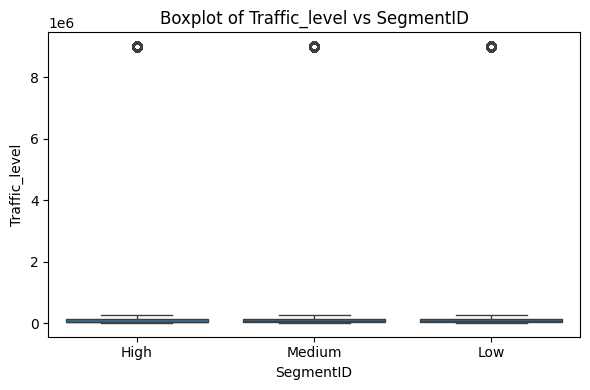

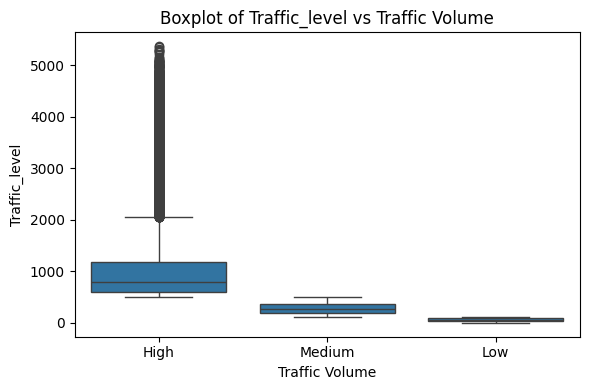

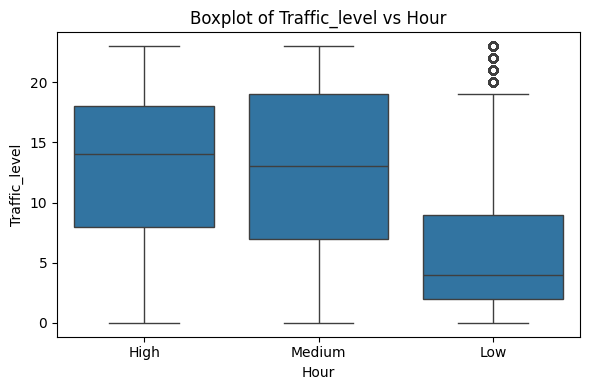

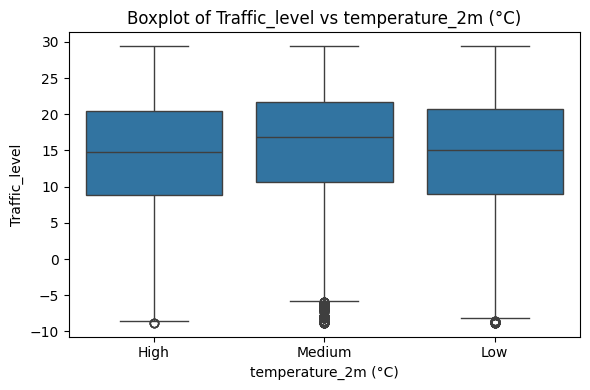

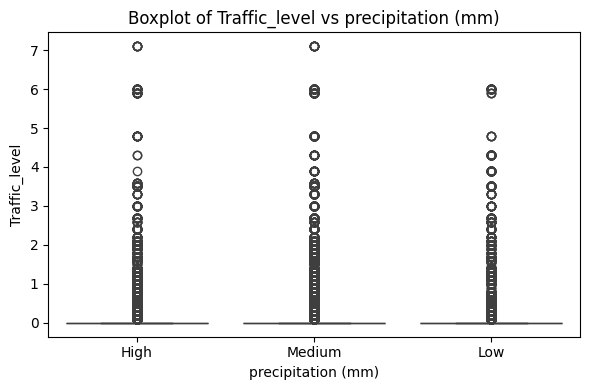

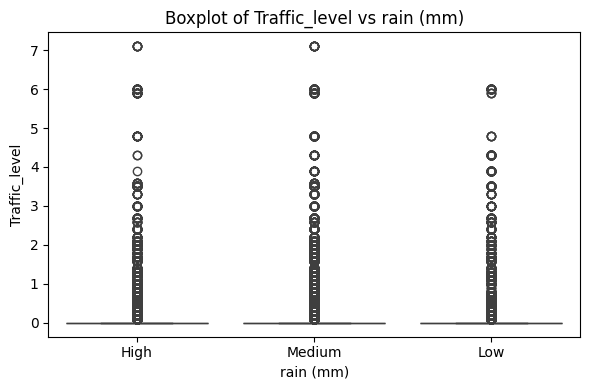

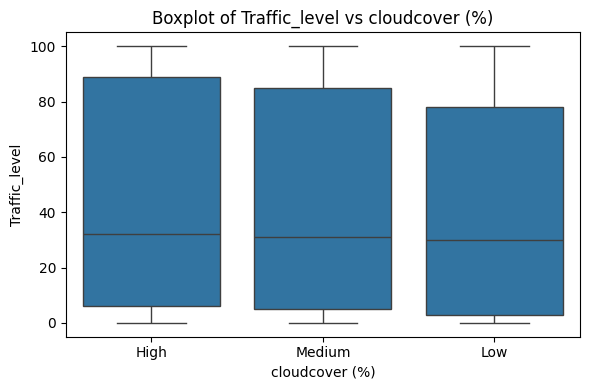

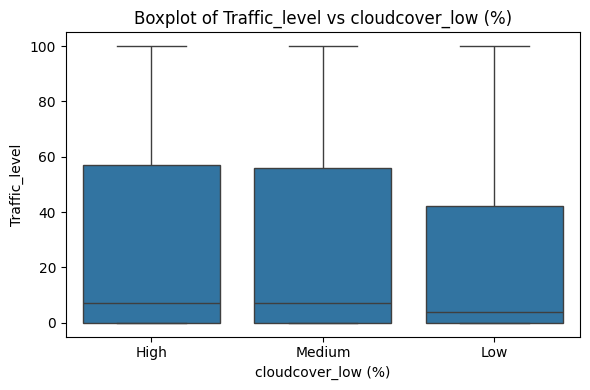

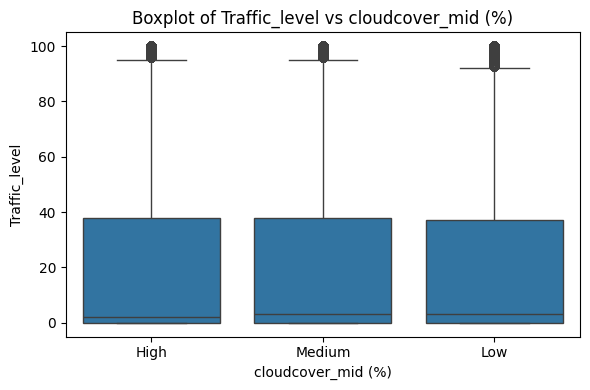

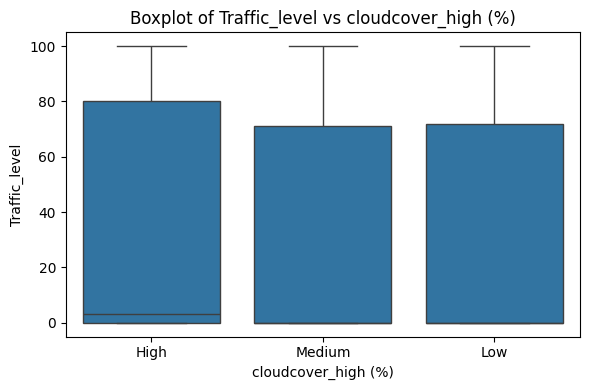

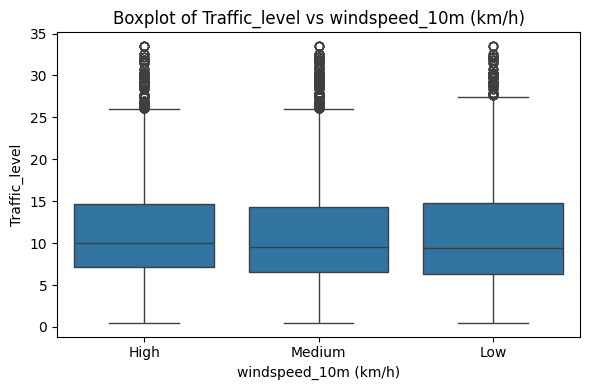

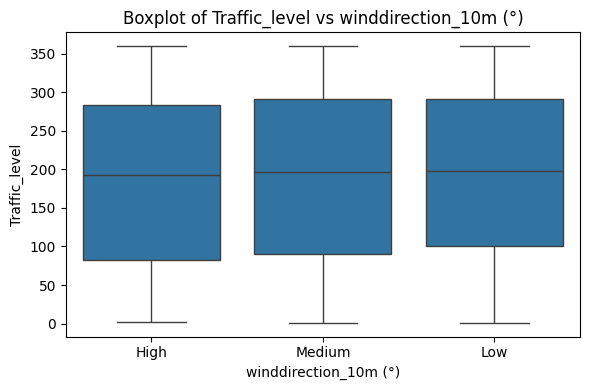

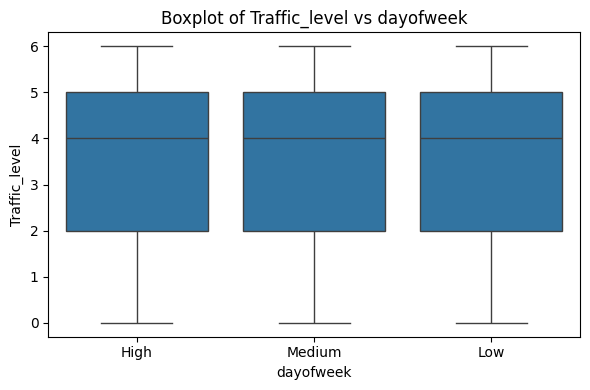

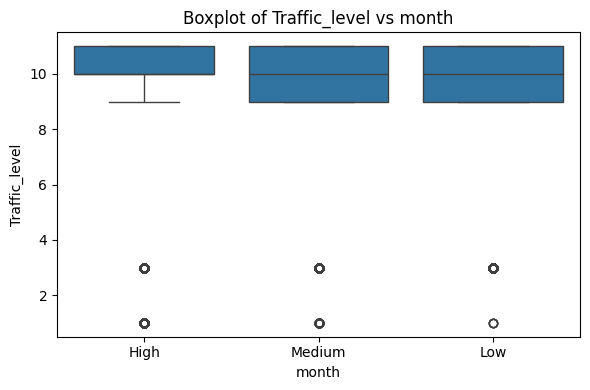

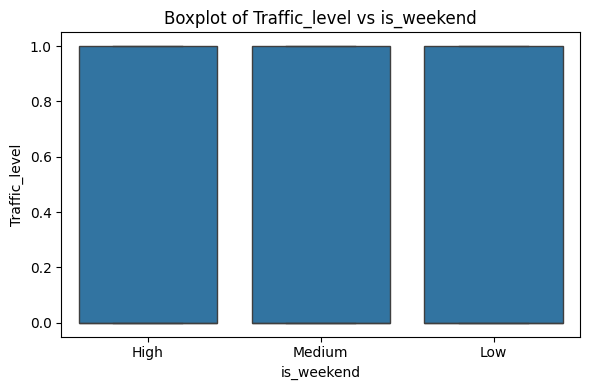

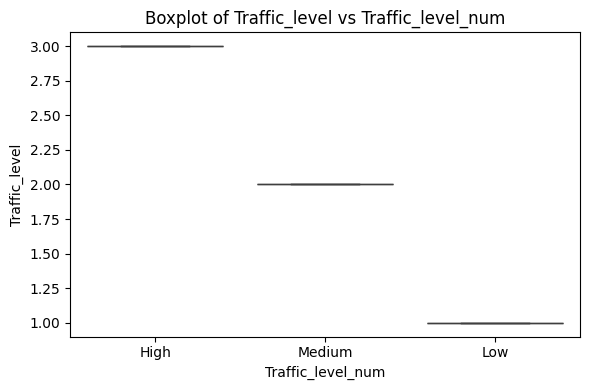

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots of Traffic_level against each numeric variable
numeric_cols = merged_df.select_dtypes(include=['number']).columns
other_vars = [col for col in numeric_cols if col != 'Traffic_level']

for col in other_vars:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=merged_df['Traffic_level'], y=merged_df[col])
    plt.title(f'Boxplot of Traffic_level vs {col}')
    plt.xlabel(col)
    plt.ylabel('Traffic_level')
    plt.tight_layout()
    plt.show()


In [44]:
outlier_dict = {}

numerical_cols = [
    'Traffic Volume', 'temperature_2m (°C)', 'precipitation (mm)', 'rain (mm)',
    'cloudcover (%)', 'cloudcover_low (%)', 'cloudcover_mid (%)',
    'cloudcover_high (%)', 'windspeed_10m (km/h)', 'winddirection_10m (°)'
]

for col in numerical_cols:
    outliers_list = []

    # Group by Traffic_level to detect outliers within each level
    for level in merged_df['Traffic_level'].unique():
        subset = merged_df[merged_df['Traffic_level'] == level]

        Q1 = subset[col].quantile(0.25)
        Q3 = subset[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = subset[(subset[col] < lower_bound) | (subset[col] > upper_bound)]

        outliers_list.append(outliers)

    # Combine all outliers for this column
    outlier_df = pd.concat(outliers_list)

    print(f'Outliers for {col}:')
    print(outlier_df[[col, 'Traffic_level']])
    print('-'*50)

    outlier_dict[col] = outlier_df


Outliers for Traffic Volume:
        Traffic Volume Traffic_level
2346              2120          High
3745              2394          High
3829              2542          High
3837              2616          High
3838              2760          High
...                ...           ...
123809            2689          High
123892            2898          High
123893            3602          High
123895            2422          High
123898            2389          High

[2617 rows x 2 columns]
--------------------------------------------------
Outliers for temperature_2m (°C):
        temperature_2m (°C) Traffic_level
51667                  -8.8          High
51669                  -8.8          High
51670                  -8.8          High
51680                  -8.8          High
15526                  -6.5        Medium
...                     ...           ...
118791                 -8.8           Low
118792                 -8.8           Low
118793                 -8.8           L

In [45]:
numerical_cols = [
    'Traffic Volume', 'temperature_2m (°C)', 'precipitation (mm)', 'rain (mm)',
    'cloudcover (%)', 'cloudcover_low (%)', 'cloudcover_mid (%)',
    'cloudcover_high (%)', 'windspeed_10m (km/h)', 'winddirection_10m (°)'
]

for col in numerical_cols:
    for level in merged_df['Traffic_level'].unique():
        
        # Get index of the current Traffic_level
        subset_idx = merged_df[merged_df['Traffic_level'] == level].index
        
        # Calculate IQR for outlier detection
        Q1 = merged_df.loc[subset_idx, col].quantile(0.25)
        Q3 = merged_df.loc[subset_idx, col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # 5th and 95th percentiles for winsorization values
        p5 = merged_df.loc[subset_idx, col].quantile(0.05)
        p95 = merged_df.loc[subset_idx, col].quantile(0.95)
        
        # Apply winsorization only to outliers
        merged_df.loc[subset_idx, col] = merged_df.loc[subset_idx, col].apply(
            lambda x: p5 if x < lower_bound else (p95 if x > upper_bound else x)
        )


C:\Users\Window\AppData\Local\Temp\ipykernel_22032\2960517298.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1286.    607.   1233.   ... 3041.15 3041.15 1121.  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged_df.loc[subset_idx, col] = merged_df.loc[subset_idx, col].apply(


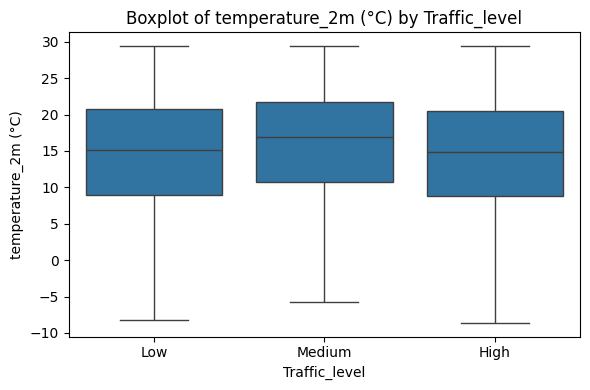

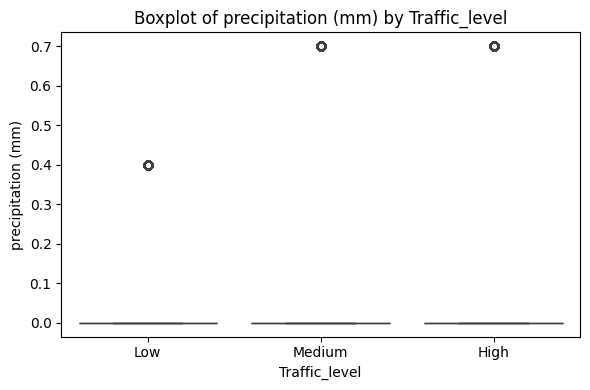

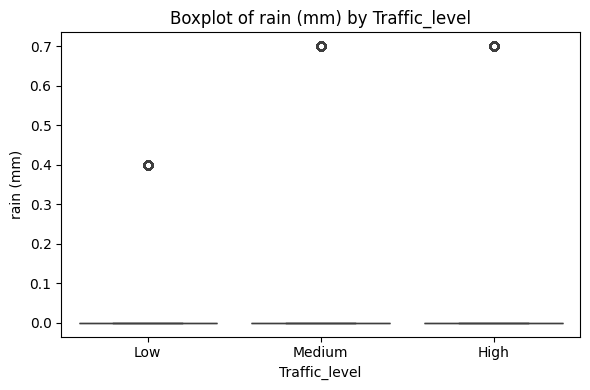

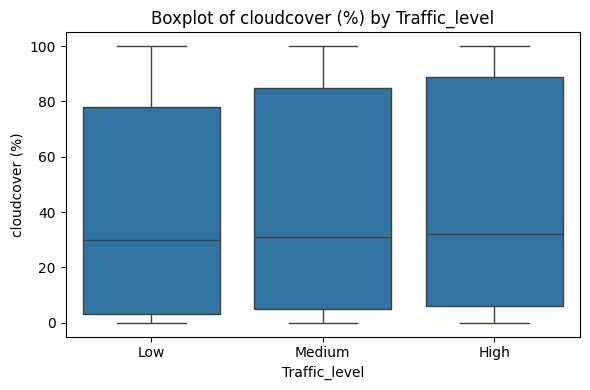

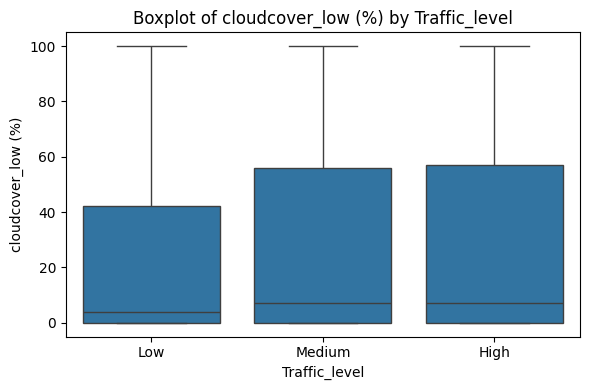

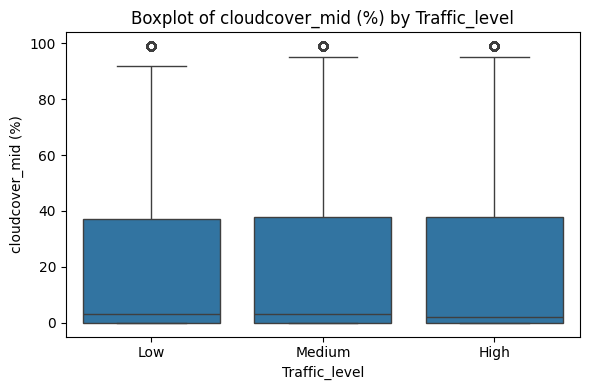

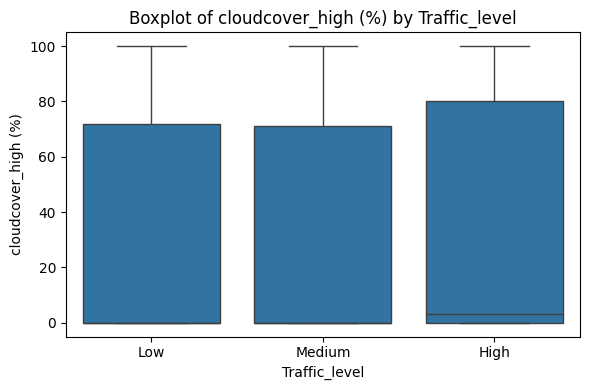

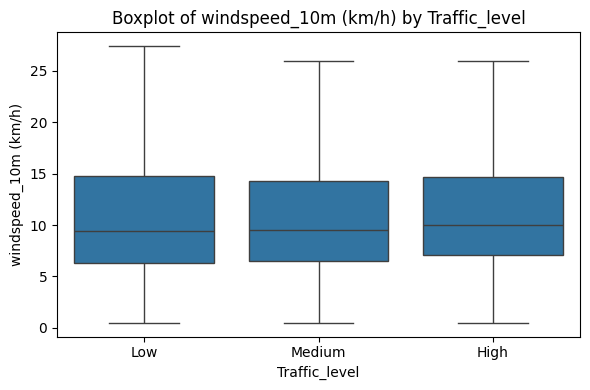

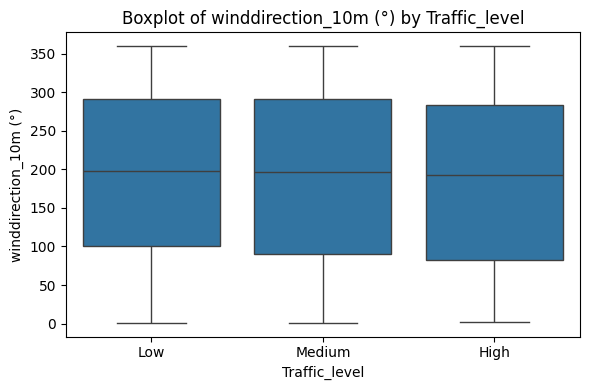

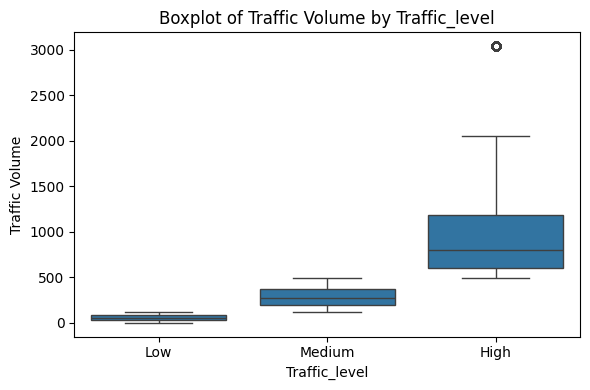

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Traffic_level is ordered (optional but helpful)
merged_df['Traffic_level'] = pd.Categorical(
    merged_df['Traffic_level'], categories=['Low', 'Medium', 'High'], ordered=True
)

# Manually selected relevant numeric columns
numeric_cols = ['temperature_2m (°C)', 'precipitation (mm)', 'rain (mm)', 
                'cloudcover (%)', 'cloudcover_low (%)', 'cloudcover_mid (%)',
                'cloudcover_high (%)', 'windspeed_10m (km/h)', 'winddirection_10m (°)', 
                'Traffic Volume']

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Traffic_level', y=col, data=merged_df)
    plt.title(f'Boxplot of {col} by Traffic_level')
    plt.xlabel('Traffic_level')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


# Logistic Regression

In [56]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Step 1: Set Traffic_level as an ordered categorical variable
merged_df['Traffic_level'] = pd.Categorical(
    merged_df['Traffic_level'],
    categories=['High', 'Medium', 'Low'],  # High = most congested
    ordered=True
)

# Step 2: Encode Traffic_level (High=0, Medium=1, Low=2)
le = LabelEncoder()
merged_df['Traffic_level_encoded'] = le.fit_transform(merged_df['Traffic_level'])

# Step 3: Group SegmentID by average traffic volume
segment_volume_mean = merged_df.groupby('SegmentID')['Traffic Volume'].mean()

# Step 4: Assign SegmentGroup based on quantiles of traffic volume
merged_df['SegmentGroup'] = pd.qcut(
    merged_df['SegmentID'].map(segment_volume_mean),
    q=3,
    labels=['High', 'Medium', 'Low']  # High = historically high traffic volume
)

# Check label mapping
label_mapping = dict(zip(le.transform(le.classes_), le.classes_))
print("Traffic Level Encoding:", label_mapping)
print("SegmentGroup labels:", merged_df['SegmentGroup'].unique())


Traffic Level Encoding: {0: 'High', 1: 'Low', 2: 'Medium'}
SegmentGroup labels: ['Low', 'High', 'Medium']
Categories (3, object): ['High' < 'Medium' < 'Low']


In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import statsmodels.api as sm


In [58]:
# ---------------------------- 1. Define Features ----------------------------
feature_cols = [
    'SegmentGroup', 'Direction', 'Hour',
    'temperature_2m (°C)', 'precipitation (mm)', 'rain (mm)',
    'cloudcover (%)', 'cloudcover_low (%)', 'cloudcover_mid (%)', 'cloudcover_high (%)',
    'windspeed_10m (km/h)', 'winddirection_10m (°)',
    'dayofweek', 'month', 'is_weekend'
]

# ---------------------------- 2. Preprocessing ----------------------------
df_model = pd.get_dummies(merged_df[feature_cols], columns=['Direction', 'SegmentGroup'], drop_first=True)
X = df_model
y = merged_df['Traffic_level_encoded']

# ---------------------------- 3. Train-Test Split ----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ---------------------------- 4. Feature Scaling ----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------- 5. Logistic Regression Model ----------------------------
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# ---------------------------- 6. Predictions & Evaluation ----------------------------
y_pred = logreg.predict(X_test_scaled)
print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# ---------------------------- 7. Cross-validation ----------------------------
X_scaled_full = scaler.fit_transform(X)
cv_scores = cross_val_score(logreg, X_scaled_full, y, cv=5, scoring='accuracy')
print(f"\n📈 Cross-Validation Accuracy: {cv_scores.mean():.4f}")
print(f"❌ Cross-Validation Error: {1 - cv_scores.mean():.4f}")

# ---------------------------- 8. Statsmodels Summary ----------------------------
X_sm_df = pd.DataFrame(X_scaled_full, columns=X.columns)
X_sm_df = sm.add_constant(X_sm_df)
model_sm = sm.MNLogit(y, X_sm_df)
result_sm = model_sm.fit(maxiter=1000, method='newton')
print("\n🧾 Statsmodels Summary:")
print(result_sm.summary())

# Optional: View odds ratios
odds_ratios = np.exp(result_sm.params)
print("\n📌 Odds Ratios:")
print(odds_ratios)


C:\Users\Window\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


📊 Confusion Matrix:
[[3192  284 2756]
 [  68 4819 1309]
 [1684 1922 8749]]

📋 Classification Report:
              precision    recall  f1-score   support

        High       0.65      0.51      0.57      6232
         Low       0.69      0.78      0.73      6196
      Medium       0.68      0.71      0.70     12355

    accuracy                           0.68     24783
   macro avg       0.67      0.67      0.67     24783
weighted avg       0.67      0.68      0.67     24783



C:\Users\Window\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Window\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Window\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Window\AppData\Local\Programs\Python\


📈 Cross-Validation Accuracy: 0.6398
❌ Cross-Validation Error: 0.3602
Optimization terminated successfully.
         Current function value: 0.683637
         Iterations 9

🧾 Statsmodels Summary:
                            MNLogit Regression Results                           
Dep. Variable:     Traffic_level_encoded   No. Observations:               123912
Model:                           MNLogit   Df Residuals:                   123874
Method:                              MLE   Df Model:                           36
Date:                   Fri, 02 May 2025   Pseudo R-squ.:                  0.3431
Time:                           18:11:37   Log-Likelihood:                -84711.
converged:                          True   LL-Null:                   -1.2896e+05
Covariance Type:               nonrobust   LLR p-value:                     0.000
Traffic_level_encoded=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------

# Random Forest

📘 Original Class Labels and Encoded Mapping:
   0 = High
   1 = Low
   2 = Medium
✅ ANOVA F-test Feature Scores:
                Feature       F_score        p_value
9     SegmentGroup_Low  33085.359380   0.000000e+00
0                 Hour   7563.294284   0.000000e+00
8  SegmentGroup_Medium   3692.814979   0.000000e+00
2   precipitation (mm)    478.057609  2.382922e-207
3            rain (mm)    469.941245  7.389426e-204
1  temperature_2m (°C)    464.605537  1.459609e-201
6                month    277.797369  4.908893e-121
5   cloudcover_low (%)    151.755327   1.563838e-66
7           is_weekend    143.653775   5.037289e-63
4       cloudcover (%)     85.619724   7.045420e-38
Fitting 5 folds for each of 12 candidates, totalling 60 fits

✅ Best Parameters from GridSearchCV:
   - max_depth: None
   - min_samples_split: 5
   - n_estimators: 200

📈 Cross-Validation Accuracy on Test Set: 0.7520 ± 0.0082
❌ Cross-Validation Error: 0.2480

✅ Confusion Matrix:
 [[4458   54 1720]
 [   9 4720 14

C:\Users\Window\AppData\Local\Temp\ipykernel_22032\3364503688.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='viridis')


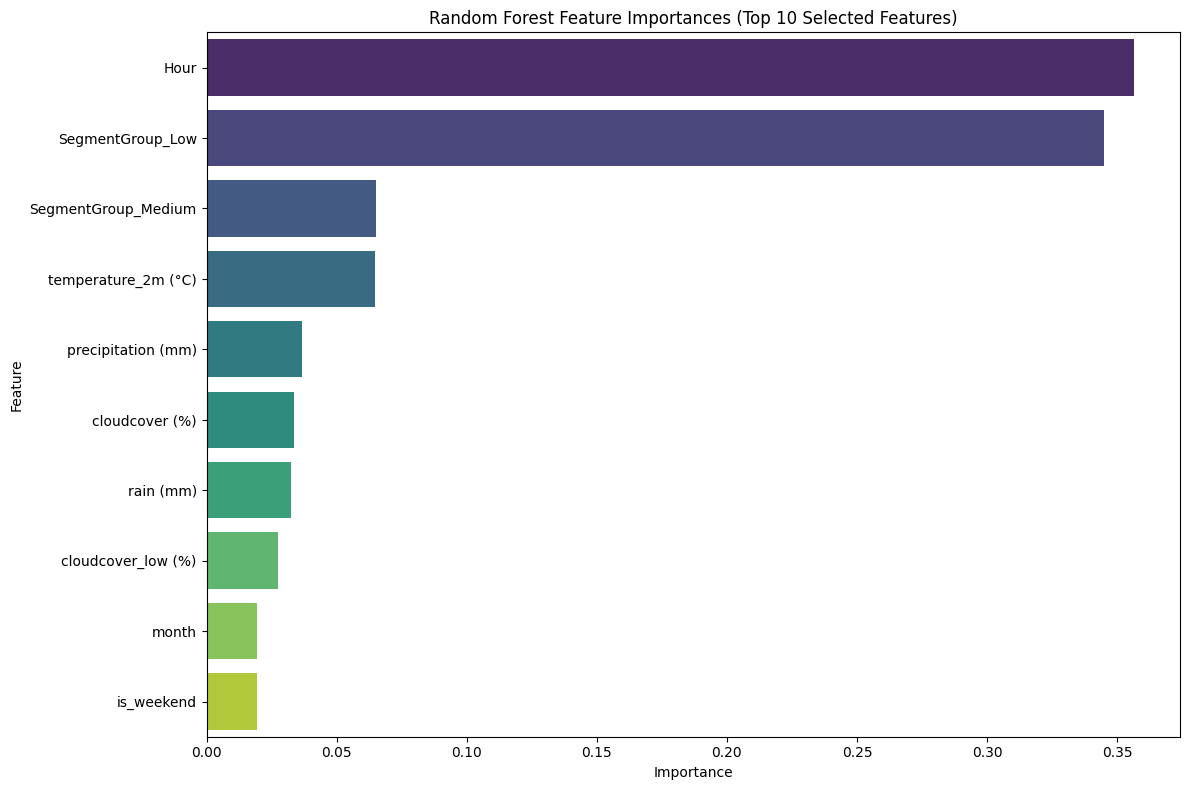

📸 Feature importance plot saved as 'rf_feature_importance.png'

🧠 Final Model Features (Top 10 by ANOVA F-test):
   1. Hour — Importance: 0.3564
   2. SegmentGroup_Low — Importance: 0.3449
   3. SegmentGroup_Medium — Importance: 0.0651
   4. temperature_2m (°C) — Importance: 0.0646
   5. precipitation (mm) — Importance: 0.0366
   6. cloudcover (%) — Importance: 0.0338
   7. rain (mm) — Importance: 0.0325
   8. cloudcover_low (%) — Importance: 0.0276
   9. month — Importance: 0.0194
   10. is_weekend — Importance: 0.0193


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# 1. Prepare data
X = df_model.copy()
le = LabelEncoder()
y = le.fit_transform(merged_df['Traffic_level'])

# 🆕 Print class label mapping
class_names = le.classes_
print("📘 Original Class Labels and Encoded Mapping:")
for i, name in enumerate(class_names):
    print(f"   {i} = {name}")

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. ANOVA F-test feature selection
selector = SelectKBest(score_func=f_classif, k=10)
X_train_kbest = selector.fit_transform(X_train_scaled, y_train)
X_test_kbest = selector.transform(X_test_scaled)

# 5. Optional: Print ANOVA F-test scores
anova_results = pd.DataFrame({
    'Feature': X.columns[selector.get_support()],
    'F_score': selector.scores_[selector.get_support()],
    'p_value': selector.pvalues_[selector.get_support()]
}).sort_values(by='F_score', ascending=False)
print("✅ ANOVA F-test Feature Scores:\n", anova_results)

# 6. Random Forest with Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_kbest, y_train)

best_rf = grid_search.best_estimator_

# 📌 Print best parameters
print("\n✅ Best Parameters from GridSearchCV:")
for param, value in grid_search.best_params_.items():
    print(f"   - {param}: {value}")

# 7. Cross-validation accuracy on test set
cv_scores = cross_val_score(best_rf, X_test_kbest, y_test, cv=5, scoring='accuracy')
mean_cv = np.mean(cv_scores)
std_cv = np.std(cv_scores)
print(f"\n📈 Cross-Validation Accuracy on Test Set: {mean_cv:.4f} ± {std_cv:.4f}")
print(f"❌ Cross-Validation Error: {1 - mean_cv:.4f}")

# 8. Final evaluation on test set
best_rf.fit(X_train_kbest, y_train)
y_pred = best_rf.predict(X_test_kbest)

print("\n✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred, target_names=class_names))

# 9. Feature Importance Plot (save to file)
selected_features = X.columns[selector.get_support()]
importances = best_rf.feature_importances_

feat_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='viridis')
plt.title('Random Forest Feature Importances (Top 10 Selected Features)')
plt.tight_layout()
plt.savefig("rf_feature_importance.png", dpi=300)
plt.show()

print("📸 Feature importance plot saved as 'rf_feature_importance.png'")

# 🆕 10. Final list of features in the model
print("\n🧠 Final Model Features (Top 10 by ANOVA F-test):")
for i, (feature, importance) in enumerate(zip(feat_importance_df['Feature'], feat_importance_df['Importance']), 1):
    print(f"   {i}. {feature} — Importance: {importance:.4f}")


# XG Boost

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\Window\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [18:28:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Classification Report:
               precision    recall  f1-score   support

        High       0.82      0.72      0.77      6232
         Low       0.80      0.76      0.78      6196
      Medium       0.76      0.83      0.79     12355

    accuracy                           0.78     24783
   macro avg       0.79      0.77      0.78     24783
weighted avg       0.79      0.78      0.78     24783

✅ Confusion Matrix:
 [[ 4508    32  1692]
 [    6  4678  1512]
 [  995  1132 10228]]

✅ Selected Features used in the final model:
1. Hour
2. temperature_2m (°C)
3. precipitation (mm)
4. rain (mm)
5. cloudcover (%)
6. cloudcover_low (%)
7. cloudcover_mid (%)
8. cloudcover_high (%)
9. windspeed_10m (km/h)
10. winddirection_10m (°)
11. dayofweek
12. month
13. is_weekend
14. Direction_NB
15. Direction_SB
16. Direction_WB
17. SegmentGroup_Medium
18. SegmentGroup_Low


C:\Users\Window\AppData\Local\Temp\ipykernel_22032\968555549.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_10_feat_imp_df, palette='crest')


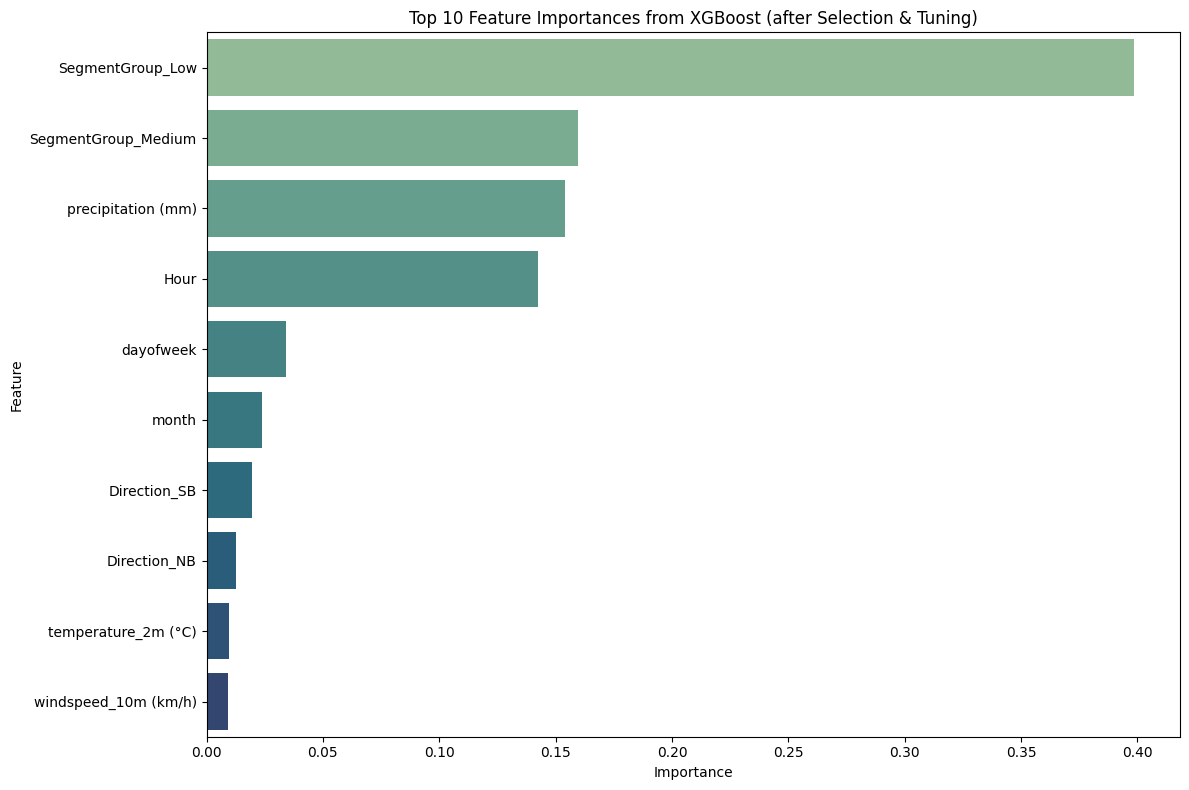

📸 Top 10 feature importance plot saved as 'xgb_feature_importance_top10.png'

✅ Best Hyperparameters from Randomized Search:
   - xgb__subsample: 1.0
   - xgb__n_estimators: 200
   - xgb__max_depth: 3
   - xgb__learning_rate: 0.2
   - select__k: all

📈 Best Cross-Validation Accuracy: 0.7854
❌ Cross-Validation Error: 0.2146


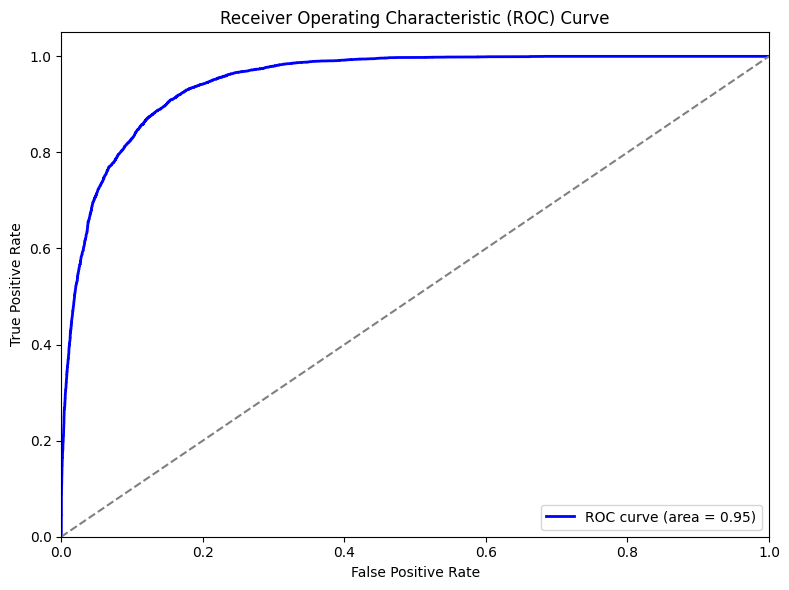

📸 AUC ROC curve saved as 'roc_curve.png'


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Step 1: Prepare data
X = df_model
le = LabelEncoder()  # Initialize label encoder
y = le.fit_transform(merged_df['Traffic_level'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 2: Create pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('select', SelectKBest(score_func=f_classif)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

# Step 3: Hyperparameter tuning with feature selection
param_dist = {
    'select__k': [5, 8, 10, 'all'],
    'xgb__n_estimators': [100, 200, 300],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__subsample': [0.7, 0.8, 1.0]
}

random_search = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Step 4: Fit model
random_search.fit(X_train, y_train)

# Step 5: Evaluate performance
y_pred = random_search.predict(X_test)
print("✅ Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 6: Feature importance from best pipeline
best_pipe = random_search.best_estimator_
selector = best_pipe.named_steps['select']
xgb_model = best_pipe.named_steps['xgb']

selected_mask = selector.get_support()
selected_features = X.columns[selected_mask]

# 🔍 Print selected features
print("\n✅ Selected Features used in the final model:")
for i, feature in enumerate(selected_features, start=1):
    print(f"{i}. {feature}")

# Step 7: Get top 10 feature importances
importances = xgb_model.feature_importances_
feat_imp_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

top_10_feat_imp_df = feat_imp_df.head(10)

# Step 8: Plot top 10 feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_10_feat_imp_df, palette='crest')
plt.title('Top 10 Feature Importances from XGBoost (after Selection & Tuning)')
plt.tight_layout()
plt.savefig("xgb_feature_importance_top10.png", dpi=300)
plt.show()

print("📸 Top 10 feature importance plot saved as 'xgb_feature_importance_top10.png'")

# Step 9: Report best hyperparameters and CV accuracy
best_params = random_search.best_params_
best_cv_score = random_search.best_score_
cv_error = 1 - best_cv_score

print("\n✅ Best Hyperparameters from Randomized Search:")
for param, val in best_params.items():
    print(f"   - {param}: {val}")

print(f"\n📈 Best Cross-Validation Accuracy: {best_cv_score:.4f}")
print(f"❌ Cross-Validation Error: {cv_error:.4f}")

# Step 10: Plot AUC ROC curve
y_prob = random_search.predict_proba(X_test)  # Get predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1], pos_label=1)  # For binary classification (modify if needed)

roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig("xg_roc_curve.png", dpi=300)
plt.show()

print("📸 AUC ROC curve saved as 'roc_curve.png'")


# KNN

Fitting 5 folds for each of 30 candidates, totalling 150 fits
✅ Classification Report:
               precision    recall  f1-score   support

        High       0.81      0.72      0.76      6232
         Low       0.76      0.77      0.76      6196
      Medium       0.76      0.80      0.78     12355

    accuracy                           0.77     24783
   macro avg       0.78      0.76      0.77     24783
weighted avg       0.77      0.77      0.77     24783

✅ Confusion Matrix:
 [[4508   58 1666]
 [  14 4744 1438]
 [1074 1405 9876]]


C:\Users\Window\AppData\Local\Temp\ipykernel_22032\1637002836.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F_score', y='Feature', data=feature_stats, palette='viridis')


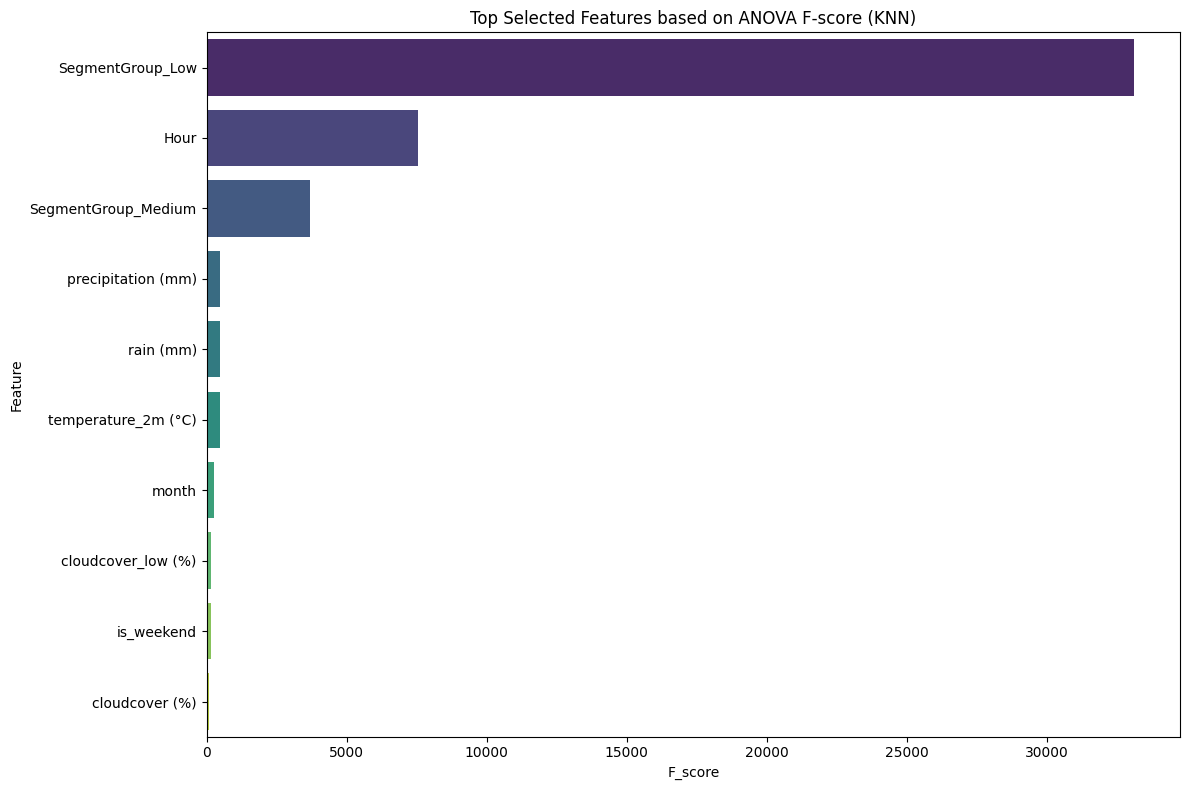

📸 ANOVA F-score plot saved as 'knn_feature_scores.png'
✅ Best Parameters from Randomized Search:
 {'select__k': 10, 'knn__weights': 'distance', 'knn__n_neighbors': 43, 'knn__metric': 'manhattan'}
🔍 Best number of neighbors (K): 43
📈 Best Cross-Validation Accuracy: 0.7711
❌ Cross-Validation Error: 0.2289


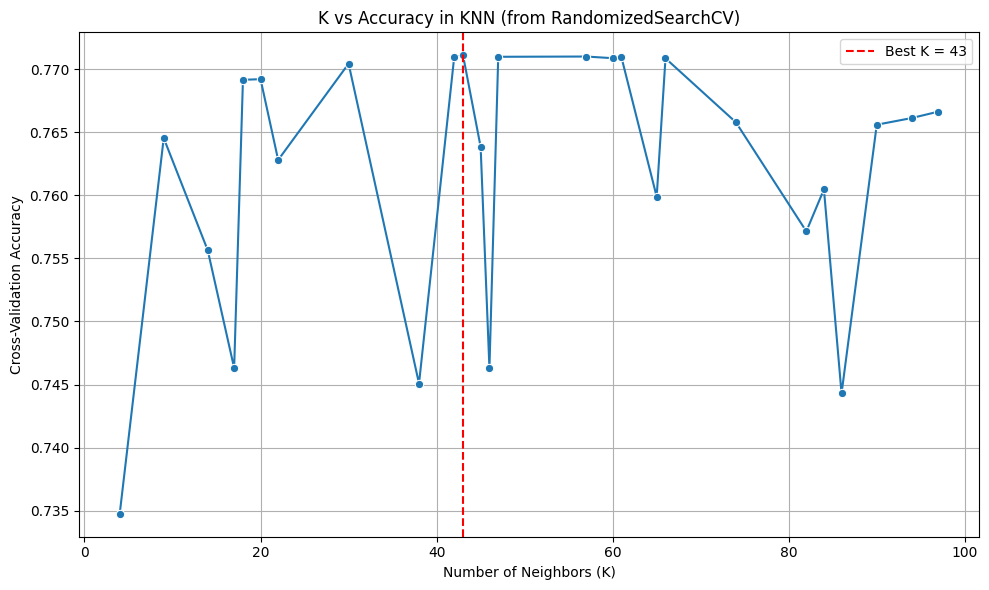

📊 K vs Accuracy plot saved as 'knn_k_vs_accuracy.png'


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Prepare data
X = df_model
y = le.fit_transform(merged_df['Traffic_level'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Build pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('select', SelectKBest(score_func=f_classif)),
    ('knn', KNeighborsClassifier())
])

# 3. Set up hyperparameter search
param_dist = {
    'select__k': [5, 8, 10, 'all'],
    'knn__n_neighbors': list(range(1, 101)),
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

random_search_knn = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# 4. Fit model
random_search_knn.fit(X_train, y_train)

# 5. Evaluate on test set
y_pred = random_search_knn.predict(X_test)
print("✅ Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 6. Get selected features and ANOVA F-scores
best_pipe_knn = random_search_knn.best_estimator_
selector = best_pipe_knn.named_steps['select']

f_scores = selector.scores_
p_values = selector.pvalues_

selected_mask = selector.get_support()
selected_features = X.columns[selected_mask]
selected_scores = f_scores[selected_mask]
selected_pvals = p_values[selected_mask]

feature_stats = pd.DataFrame({
    'Feature': selected_features,
    'F_score': selected_scores,
    'p_value': selected_pvals
}).sort_values(by='F_score', ascending=False)

# Plot and save feature scores
plt.figure(figsize=(12, 8))
sns.barplot(x='F_score', y='Feature', data=feature_stats, palette='viridis')
plt.title('Top Selected Features based on ANOVA F-score (KNN)')
plt.tight_layout()
plt.savefig("knn_feature_scores.png", dpi=300)
plt.show()

print("📸 ANOVA F-score plot saved as 'knn_feature_scores.png'")

# 7. Best hyperparameters and cross-validation performance
best_k = random_search_knn.best_params_['knn__n_neighbors']
best_cv_score = random_search_knn.best_score_
cv_error = 1 - best_cv_score

print("✅ Best Parameters from Randomized Search:\n", random_search_knn.best_params_)
print(f"🔍 Best number of neighbors (K): {best_k}")
print(f"📈 Best Cross-Validation Accuracy: {best_cv_score:.4f}")
print(f"❌ Cross-Validation Error: {cv_error:.4f}")

# 8. Plot K vs Accuracy
results_df = pd.DataFrame(random_search_knn.cv_results_)

# Filter for unique values of K and corresponding accuracy
k_scores = results_df[['param_knn__n_neighbors', 'mean_test_score']]
k_scores = k_scores.drop_duplicates(subset='param_knn__n_neighbors')
k_scores = k_scores.sort_values(by='param_knn__n_neighbors')

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='param_knn__n_neighbors', y='mean_test_score', data=k_scores, marker='o')
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Best K = {best_k}')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('K vs Accuracy in KNN (from RandomizedSearchCV)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("knn_k_vs_accuracy.png", dpi=300)
plt.show()

print("📊 K vs Accuracy plot saved as 'knn_k_vs_accuracy.png'")


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Boxplot 1: Hour vs Traffic Level
plt.figure(figsize=(6, 4))
sns.boxplot(x='Traffic_level', y='Hour', data=merged_df)
plt.title('Hour vs Traffic Level')
plt.tight_layout()
plt.savefig("boxplot_hour_vs_traffic_level.png", dpi=300)
plt.close()

# Boxplot 2: Precipitation vs Traffic Level (log scale for better visibility)
plt.figure(figsize=(6, 4))
sns.boxplot(x='Traffic_level', y='precipitation (mm)', data=merged_df)
plt.yscale('log')  # Optional: use log scale if needed
plt.title('Precipitation vs Traffic Level (Log Scale)')
plt.tight_layout()
plt.savefig("boxplot_precipitation_vs_traffic_level.png", dpi=300)
plt.close()

# Boxplot 3: Rain vs Traffic Level
plt.figure(figsize=(6, 4))
sns.boxplot(x='Traffic_level', y='rain (mm)', data=merged_df)
plt.yscale('log')  # Optional for visibility
plt.title('Rain vs Traffic Level (Log Scale)')
plt.tight_layout()
plt.savefig("boxplot_rain_vs_traffic_level.png", dpi=300)
plt.close()

# Boxplot 4: Temperature vs Traffic Level
plt.figure(figsize=(6, 4))
sns.boxplot(x='Traffic_level', y='temperature_2m (°C)', data=merged_df)
plt.title('Temperature vs Traffic Level')
plt.tight_layout()
plt.savefig("boxplot_temperature_vs_traffic_level.png", dpi=300)
plt.close()


Text(0.5, 1.0, 'Precipitation vs Traffic Level (Log Scale)')

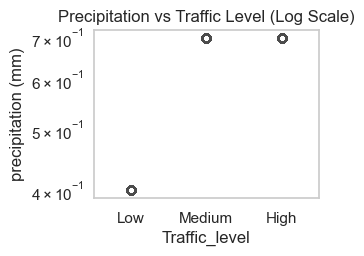

In [47]:
plt.subplot(2, 2, 2)
sns.boxplot(x='Traffic_level', y='precipitation (mm)', data=merged_df)
plt.yscale('log')
plt.title('Precipitation vs Traffic Level (Log Scale)')


In [49]:
merged_df['precipitation (mm)'].describe()

count    123912.000000
mean          0.070501
std           0.203968
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           0.700000
Name: precipitation (mm), dtype: float64

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of weather-related variables
weather_vars = [
    'temperature_2m (°C)',
    'precipitation (mm)',
    'rain (mm)',
    'cloudcover (%)',
    'windspeed_10m (km/h)'
]

# Loop to generate and save each plot
for var in weather_vars:
    plt.figure(figsize=(10, 5))
    
    # Scatter plot
    sns.scatterplot(data=merged_df, x=var, y='Traffic Volume', alpha=0.3)
    
    # Regression line
    sns.regplot(data=merged_df, x=var, y='Traffic Volume', scatter=False, color='red')
    
    # Titles and labels
    plt.title(f"Traffic Volume vs. {var}")
    plt.xlabel(var)
    plt.ylabel("Traffic Volume")
    plt.tight_layout()
    
    # Save plot as PNG
    filename = f"Traffic_Volume_vs_{var.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '')}.png"
    plt.savefig(filename, dpi=300)
    plt.close()  # Closes the figure to save memory
